Get all the data from spreadsheet:

In [1]:
import ezodf
from pandas_ods_reader import read_ods

path = "mice_data.ods"
sheet_name = "time"
notes_table_time = read_ods(path, sheet_name)

sheet_name = "water"
notes_table_water = read_ods(path, sheet_name)

sheet_name = "lesion"
notes_table_lesion = read_ods(path, sheet_name)

## Experiments with decreasing amount of time

Previously trained mice to exploit\explore were put on the grid, where both water to exploit and explore were present - 0.4 ml and 0.6 ml respectively. Time mice had to drink water on the grid was decreased from 1m to 30 s. 

Get the data and plot all of the mice trajectories :

['8.7S2C2M1', '8.7S2C3M1', '8.7S1C1M2', '8.6S1C1M1', '8.8S2C3M1', '8.7S3C2M2', '8.7S3C3M2', '8.6S1C1M2', '8.7S3C1M2', '8.7S2C1M2', '8.1S2C2M0', '8.8S2C1M0', '8.7S3C3M0', '8.6S1C2M1', '8.1S1C3M1', '8.6S1C1M0', '8.7S1C2M0', '8.1S2C2M2', '8.7S2C2M2', '8.6S1C3M1', '8.1S2C3M2', '8.7S2C3M0', '8.6S1C2M2', '8.8S1C2M0', '8.8S1C3M1', '8.7S2C3M2', '8.7S1C3M1', '8.6S1C3M2', '8.8S1C1M1', '8.1S2C1M2', '8.1S12C2M1', '8.7S3C1M0', '8.8S1C1M0', '8.1S2C3M0', '8.8S1C1M2', '8.7S1C2M1', '8.7S2C1M1', '8.7S3C2M1', '8.7S3C2M0', '8.1S12C2M0', '8.7S2C2M0', '8.8S1C2M1', '8.8S2C1M2', '8.1S12C1M2', '8.7S3C1M1', '8.1S1C3M2', '8.1S2C1M1', '8.8S1C2M2', '8.8S2C1M1', '8.7S1C1M0', '8.7S1C1M1', '8.1S1C3M0', '8.7S1C3M2', '8.8S1C3M0', '8.1S12C1M1', '8.8S1C3M2', '8.1S12C2M2', '8.6S1C3M0', '8.7S2C1M0', '8.8S2C3M0', '8.1S12C1M0', '8.7S3C3M1', '8.7S1C3M0', '8.6S1C2M0', '8.7S1C2M2', '8.1S2C2M1', '8.1S2C1M0', '8.8S2C3M2']


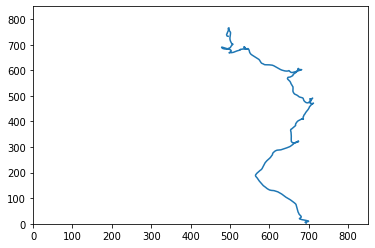

8.7S2C2M1


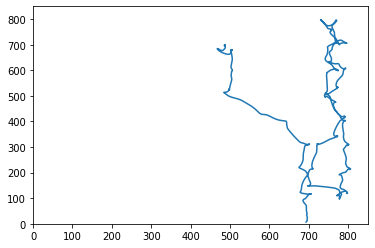

8.7S2C3M1


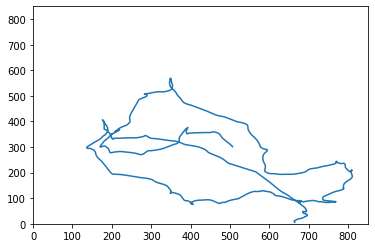

8.7S1C1M2


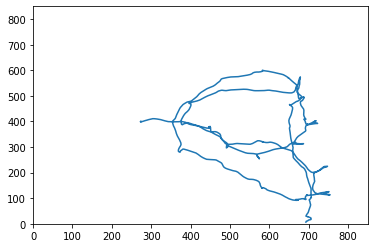

8.6S1C1M1


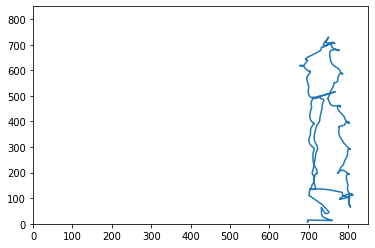

8.8S2C3M1


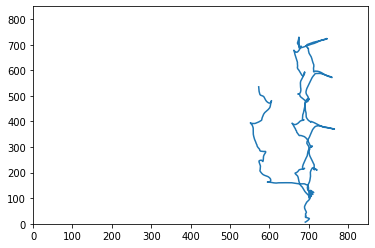

8.7S3C2M2


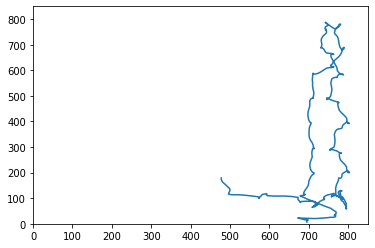

8.7S3C3M2


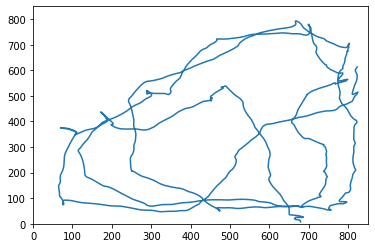

8.6S1C1M2


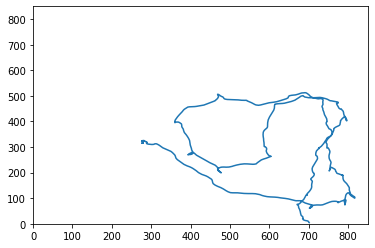

8.7S3C1M2


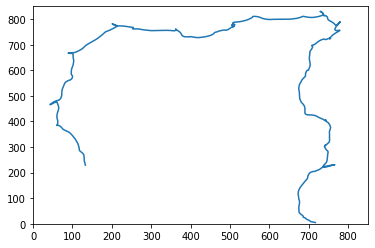

8.7S2C1M2


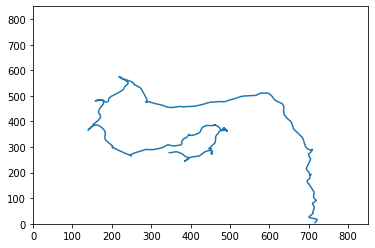

8.1S2C2M0


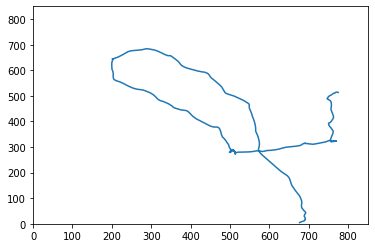

8.8S2C1M0


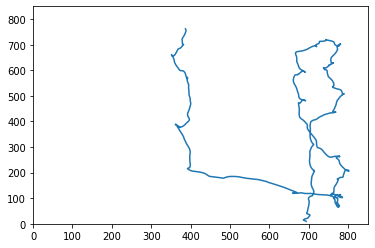

8.7S3C3M0


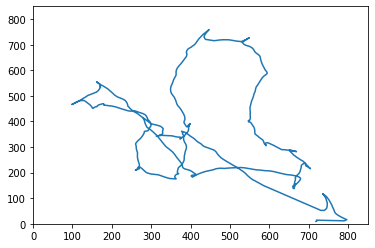

8.6S1C2M1


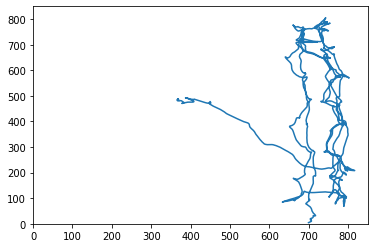

8.1S1C3M1


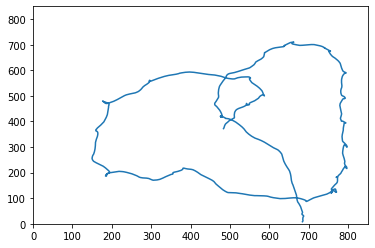

8.6S1C1M0


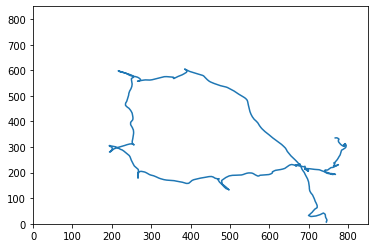

8.7S1C2M0


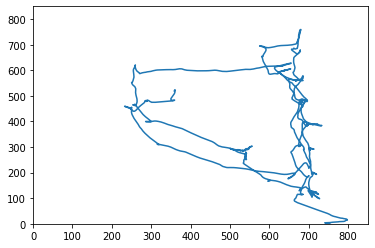

8.1S2C2M2


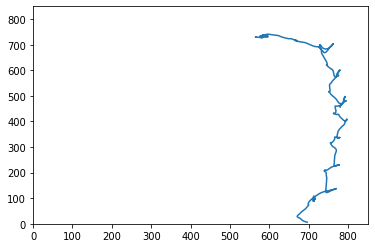

8.7S2C2M2


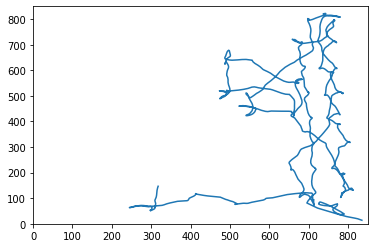

8.6S1C3M1


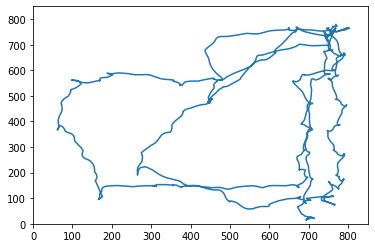

8.1S2C3M2


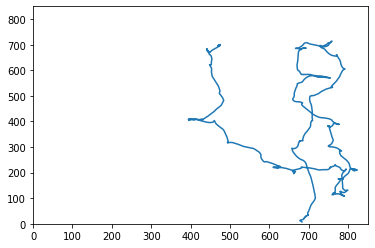

8.7S2C3M0


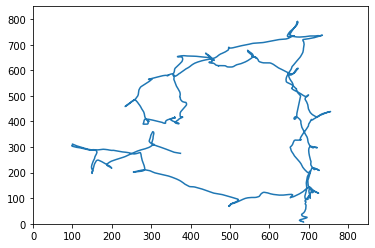

8.6S1C2M2


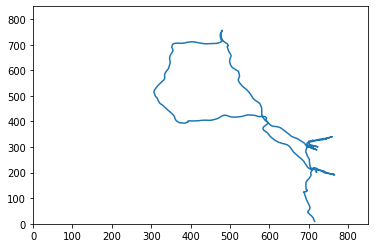

8.8S1C2M0


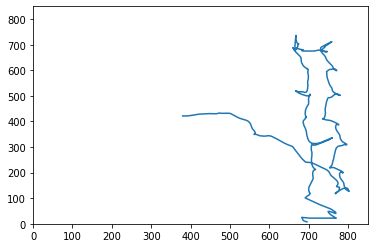

8.8S1C3M1


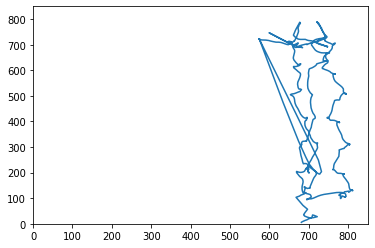

8.7S2C3M2


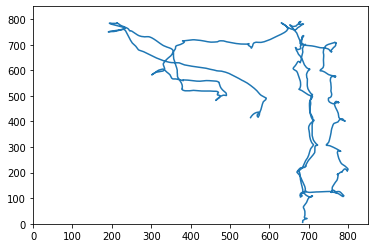

8.7S1C3M1


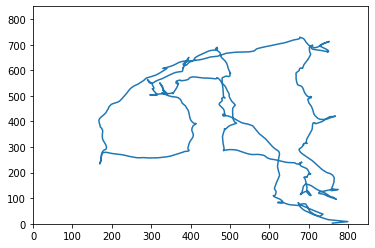

8.6S1C3M2


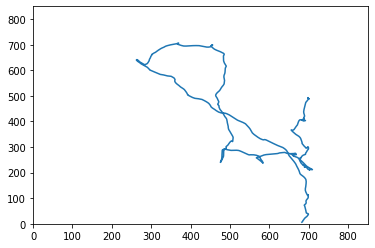

8.8S1C1M1


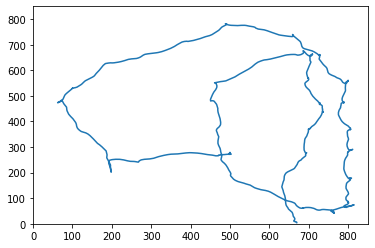

8.1S2C1M2


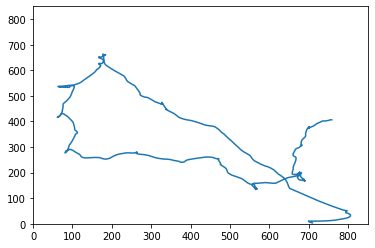

8.1S12C2M1


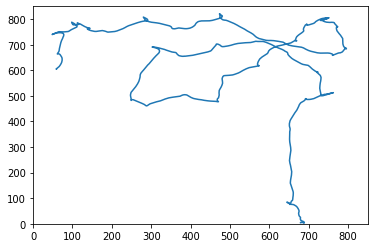

8.7S3C1M0


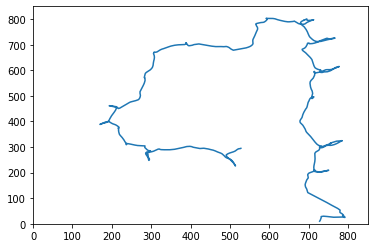

8.8S1C1M0


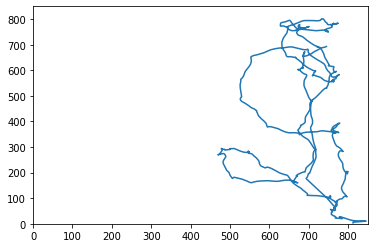

8.1S2C3M0


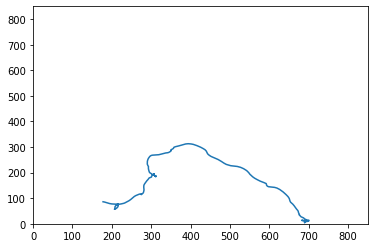

8.8S1C1M2


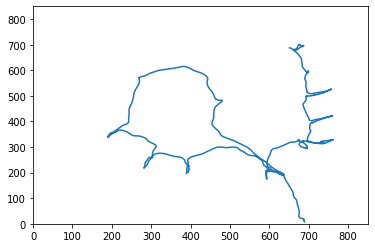

8.7S1C2M1


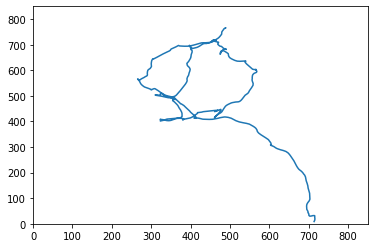

8.7S2C1M1


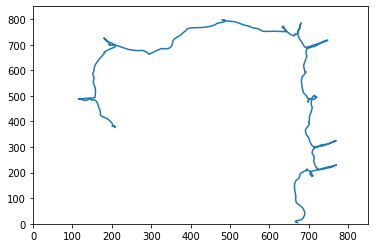

8.7S3C2M1


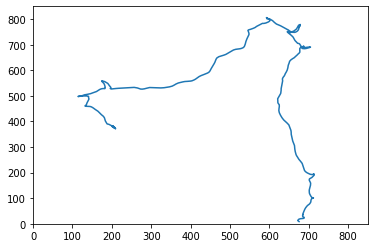

8.7S3C2M0


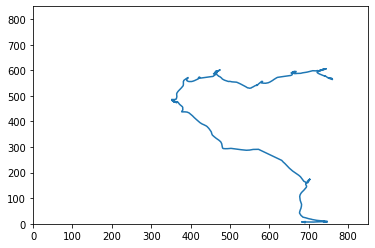

8.1S12C2M0


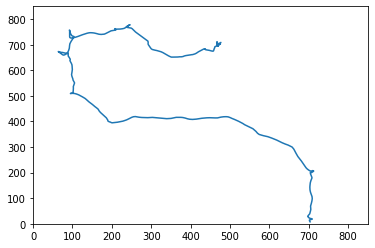

8.7S2C2M0


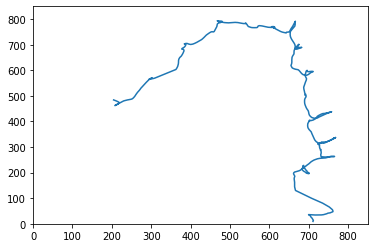

8.8S1C2M1


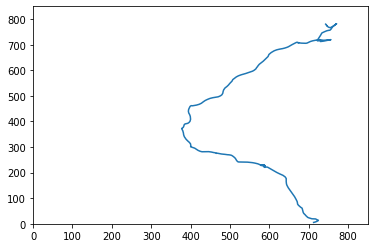

8.8S2C1M2


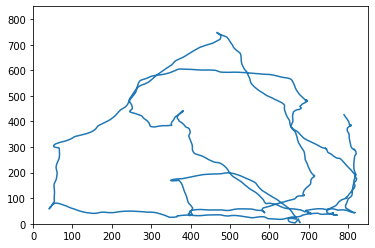

8.1S12C1M2


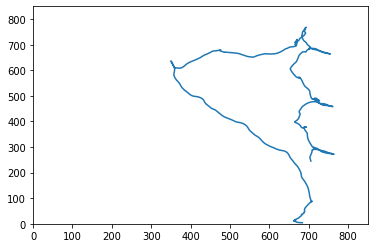

8.7S3C1M1


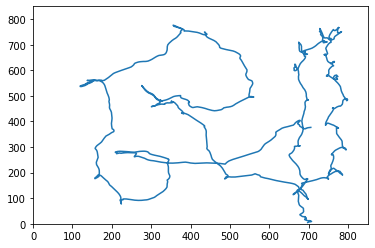

8.1S1C3M2


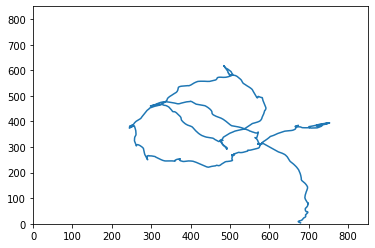

8.1S2C1M1


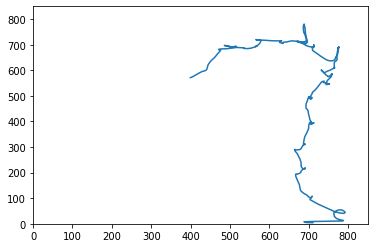

8.8S1C2M2


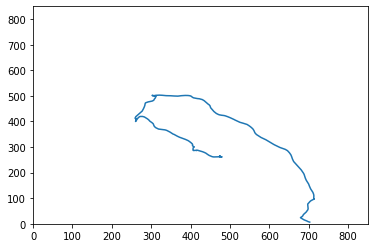

8.8S2C1M1


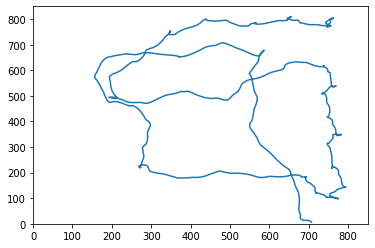

8.7S1C1M0


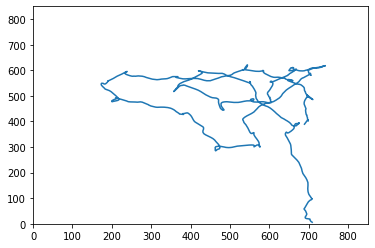

8.7S1C1M1


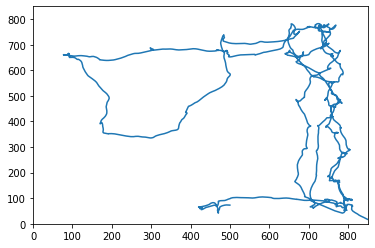

8.1S1C3M0


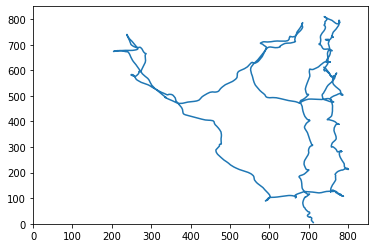

8.7S1C3M2


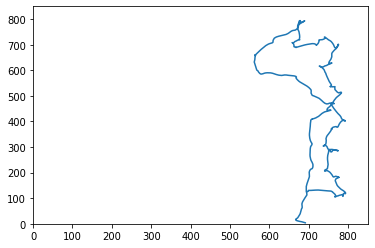

8.8S1C3M0


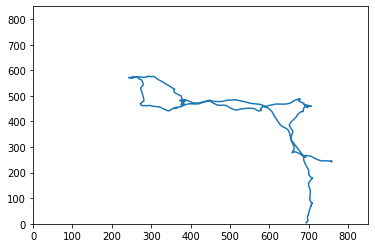

8.1S12C1M1


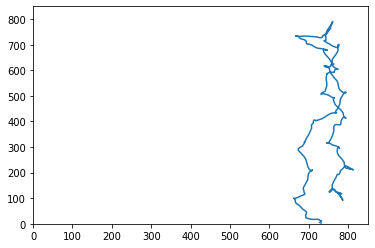

8.8S1C3M2


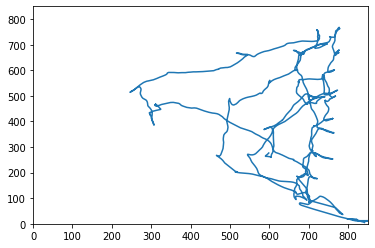

8.1S12C2M2


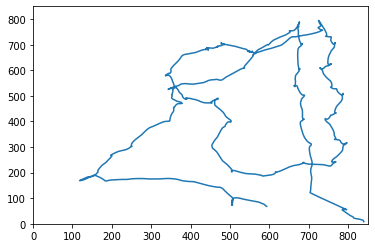

8.6S1C3M0


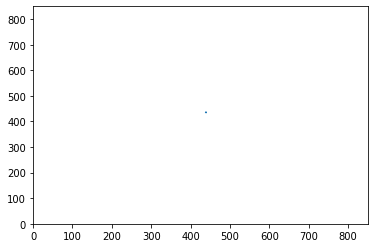

8.7S2C1M0


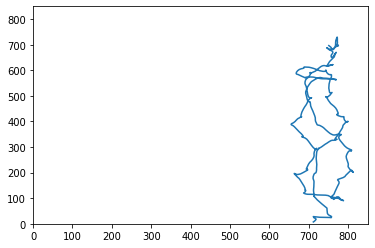

8.8S2C3M0


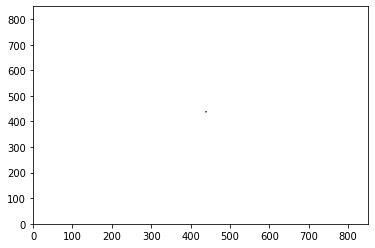

8.1S12C1M0


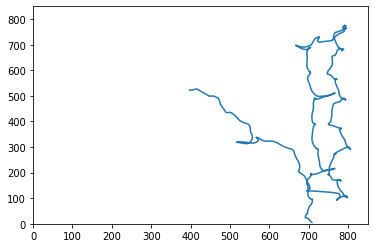

8.7S3C3M1


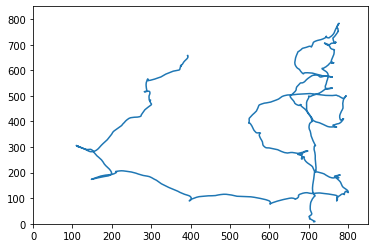

8.7S1C3M0


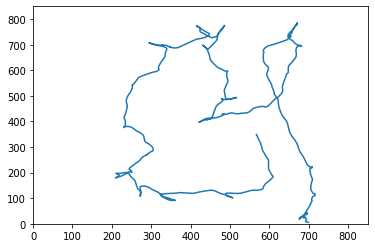

8.6S1C2M0


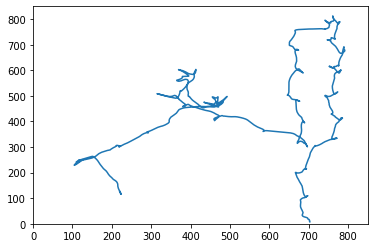

8.7S1C2M2


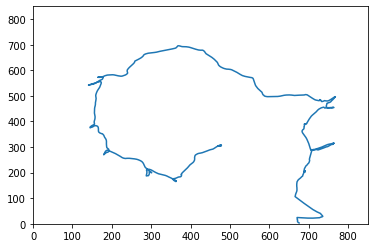

8.1S2C2M1


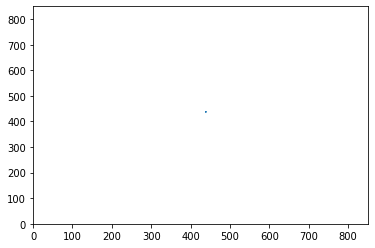

8.1S2C1M0


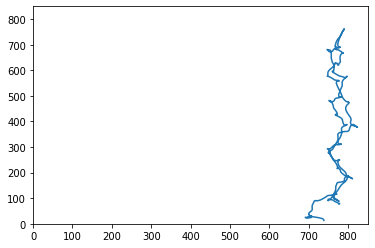

8.8S2C3M2


In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    
def get_file_names(path, notes_table_water):
    # changes the current working directory to the given path
    os.chdir(path)
    list_of_files = os.listdir(path)
    numb_of_bad_measurements = 0
    #Create an empty data frame
    d = {'date': [0], 'session': [0], 'cage': [0], 'mice': [0], 'proc_exploration': [0], 'exploration_time':[0],'exploitation_time':[0]}
    record_table = pd.DataFrame(data=d, index = None)
    print(list_of_files)
    for file in list_of_files:
        try:
            table = convert_file_to_table(file)
            x,y,t = get_xyt(table)
            draw_xy(x, y)
            proc_exploration,exploration_time, exploitation_time = calculate_exploration_exploitation(x)
        
            record_table = fill_table(file, proc_exploration,exploration_time, exploitation_time,record_table)
        except:
            numb_of_bad_measurements = numb_of_bad_measurements + 1
            pass
        
        
        
    result = combine_two_tables(notes_table_water, record_table)
    result = result.loc[(result['proc_exploration'] != 1)]
    return result, numb_of_bad_measurements
    
def fill_table(file, proc_exploration,exploration_time, exploitation_time, df):
    
    date, session, cage, mice = get_mice_number(file)
    d2 = {'date': [date], 'session': [session], 'cage': [cage], 'mice': [mice], 'proc_exploration': [proc_exploration], 'exploration_time':[exploration_time],'exploitation_time':[exploitation_time]}
    df2 = pd.DataFrame(data=d2, index = None)
    df= pd.concat([df, df2])
    return df 
        
def convert_file_to_table(file_name):

    f1 = open(file_name, "r") # open the file in read mode
    datas = f1.read() # read the file and get all of it in one string 
    S = ""
    data2 = []
    k = 0
    arr = np.empty((9,), int)
    
  
    for i in range(len(datas)):
        if datas[i]=="\t":
            data2.append(float(S))
            S  = ""
        elif datas[i]=="\n":
            if S != "":
                data2.append(float(S))
            S  = ""

            data2 = np.asarray(data2)
            arr = np.concatenate( ( arr, data2 ) , axis=0)
            data2 = []
        elif datas[i]==" ":
            if k == 0:
                data2.append(float(S))
                S  = ""
            k = k + 1

            data2 = np.asarray(data2)
            arr = np.concatenate( ( arr, data2 ) , axis=0)
            data2 = []
        else:
            k = 0
            S = S + datas[i]
            
    sh = arr.shape[0] // 9
    arr = arr.reshape((sh,9))
    arr = arr[1:, :]
    return(arr)
def get_xyt(table):
    x = table[:,7]
    split = 0 
    split2 = 0
    for i in x:
        split = split + 1
        if i!= 440:
            beg_x = i
            break
    x1 = x[split:]
    for i in x1:
        split2 = split2 + 1
        if i== 440:
            break

    y = table[:,8]
    x1 = x[split:split2]
    y1 = y[split:split2]
    t = table[:,0]
    t1 = t[split:split2]
    beg_x = x1[0]
    beg_y = y1[0]
    return x1, y1, t1

def calculate_exploration_exploitation(x):
    exploration_time = 0
    exploitation_time = 0
    for i in x:
        if i > 650:
            exploitation_time = exploitation_time + 1
        else:
            exploration_time = exploration_time + 1
#     unit conversion
    exploitation_time = exploitation_time/ 31.499793814499537
    exploration_time = exploration_time/ 31.499793814499537
    proc_exploration = exploration_time/(exploitation_time + exploration_time)       
    return proc_exploration,exploration_time, exploitation_time
    
def draw_xy(x,y): 
    plt.plot(x,y)
    plt.xlim((0,850))
    plt.ylim((0,850))
    plt.show()
    
def get_mice_number(file):
    print(file)
    date = ""
    session =""
    name= ""
    mice =""
    cage =""
    for i in file:
        if i == "S":
            date = float(name) 
            name = ""
        if i == "C":
            session = float(name[1])
            name = ""
        if i == "M":
            cage = float(name[1])
            name = ""
        name = name + i
    mice = float(name[1])
    return (date, session, cage, mice)

def combine_two_tables(notes_table, record_table):
    notes_table.rename(columns={'session ':'session'}, 
                 inplace=True)
    record_table = record_table.loc[(record_table['date'] != 0)]
    result = pd.merge(notes_table, record_table, how = 'outer', sort=False)
    return result

 
        

data_table_time, err = get_file_names("/home/david/Desktop/Ania/New_setup/Experiment_Ania", notes_table_time)
data_table_time = data_table_time.fillna(0)
data_table_time = data_table_time.loc[(data_table_time['exploitation_time'] > 0)]


 Plot time spend to exploit vs time of the session for each mice:

cage 2 mice 2
cage 3 mice 0
cage 3 mice 1
cage 3 mice 2


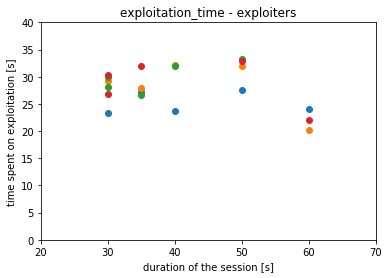

cage 1 mice 0
cage 1 mice 1
cage 1 mice 2
cage 2 mice 0
cage 2 mice 1


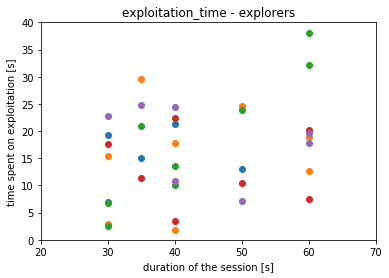

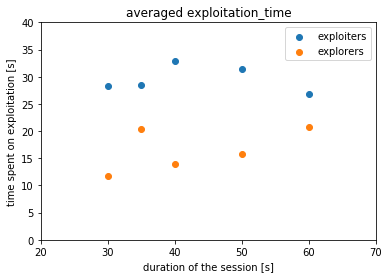

In [75]:
def plot_time_one_plot(data_table , mice_type):
    if mice_type == "exploiters":
        mice_numb = [(2,2), (3,0), (3,1), (3,2)]
    elif mice_type == "explorers":
        mice_numb= [(1,0), (1,1), (1,2), (2,0), (2,1)]
    
    for j, i in mice_numb:
        print("cage", j, "mice", i, )
        cage_number = j
        mice_number = i
        data = data_table_time.loc[(data_table_time['cage'] == cage_number)&(data_table_time['mice'] == mice_number)]
        plot_time_exp_vs_time(data, mice_type)
    plt.show()
def plot_time_exp_vs_time(data, mice_type):  
    time = data['time']
    exploitation_time = data['exploitation_time']
    plt.scatter(time, exploitation_time)
    plt.title("exploitation_time -" + " " + mice_type)
    plt.xlabel("duration of the session [s]")
    plt.ylabel("time spent on exploitation [s]")
    plt.xlim(20,70)
    plt.ylim(0,40)
def plot_mean_time(data_table_time, mice_type): 
    if mice_type == "exploiters":
        mice_numb = [(2,2), (3,0), (3,1), (3,2)]
    elif mice_type == "explorers":
        mice_numb= [(1,0), (1,1), (1,2), (2,0), (2,1)]
    time_tot = [30, 35, 40, 50, 60]
    lists = []
    for k in time_tot:
        time_exploit = 0
        num = 0
        for j, i in mice_numb:
            cage_number = j
            mice_number = i
            data = data_table_time.loc[(data_table_time['cage'] == cage_number)&(data_table_time['mice'] == mice_number)&(data_table_time['time'] == k)]
            time_exploit = time_exploit + data['exploitation_time'].sum()
            num = num + len(data['exploitation_time'])
#             print(data['exploitation_time'].sum())
#             print(len(data['exploitation_time']))
        aver = time_exploit/num
        
        lists.append(aver)
        
    plt.title("averaged exploitation_time" )
    plt.xlabel("duration of the session [s]")
    plt.ylabel("time spent on exploitation [s]")
    plt.xlim(20,70)
    plt.ylim(0,40)
    plt.scatter(time_tot, lists , label= mice_type)
    plt.legend()
    
# plot_all_separately() 

# plot_exploiters_time(result2)
# plot_explorers_time(result2)
plot_time_one_plot(data_table_time , "exploiters")
plot_time_one_plot(data_table_time , "explorers")

plot_mean_time(data_table_time , "exploiters")
plot_mean_time(data_table_time , "explorers")


# plot_proc_exp_vs_time(1, 2)

Correlation between number of cups of water drunk (18 per session in exploitation site) and time spent on exploration

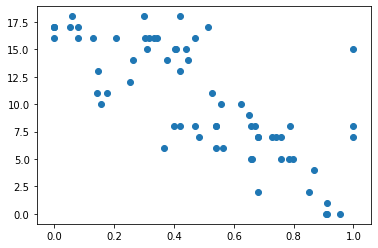

In [85]:
d = data_table_time
pro = d["proc_exploration"]
num = d["numb of drunk"]
plt.scatter(pro,num)

## Experiments with decreasing amount of water

Mice were given 30s to drink water from the grid. The amount of water in exploitation site was decreased from 0.4 ml to 0.05 ml.


Get the data and plot all of the mice trajectories 

['8.12S2C1M1', '8.20S3C2M1', '8.19S2C1M0', '8.12S1C2M0', '8.20S1C1M0', '8.19S3C3M1', '8.22S1C3M0', '8.20S2C2M2', '8.23S2C1M2', '8.22S2C3M2', '8.26S2C3M1', '8.12S2C3M1', '8.19S3C1M1', '8.23S2C3M1', '8.19S2C3M2', '8.23S1C3M2', '8.21S2C3M0', '8.12S1C1M2', '8.21S3C3M2', '8.26S2C3M0', '8.21S3C3M0', '8.19S3C2M2', '8.22S2C2M0', '8.13S2C2M1', '8.19S1C1M2', '8.16S2C2M1', '8.22S2C3M1', '8.13S2C2M2', '8.14S1C2M0', '8.14S2C3M0', '8.8S2C3M1', '8.12S2C3M2', '8.21S2C3M2', '8.23S2C2M2', '8.23S2C3M0', '8.20S3C3M2', '8.12S1C3M9', '8.22S3C3M0', '8.16S1C3M1', '8.21S3C2M2', '8.22S2C2M1', '8.26S1C2M0', '8.26S2C2M2', '8.14S2C1M2', '8.23S1C2M2', '8.16S1C1M0', '8.20S1C3M1', '8.14S2C2M0', '8.27S1C2M1', '8.19S3C1M0', '8.20S2C1M2', 'README.md', '8.19S2C2M1', '8.27S1C1M0', '8.21S1C3M0', '8.13S1C1M1', '8.14S3C3M0', '8.14S2C3M2', '8.14S1C3M0', '8.21S2C1M2', '8.14S1C2M2', '8.22S2C1M1', '8.26S1C3M0', '8.14S1C1M1', '8.26S1C2M1', '8.14S1C1M2', '8.8S2C2M0', '8.16S2C1M1', '8.12S2C2M2', '8.14S3C1M2', '8.23S1C1M0', '8.8S2C1

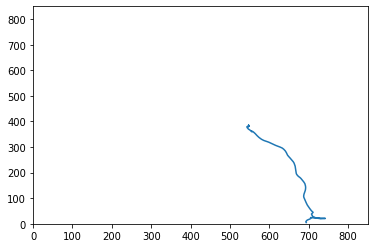

8.12S2C1M1


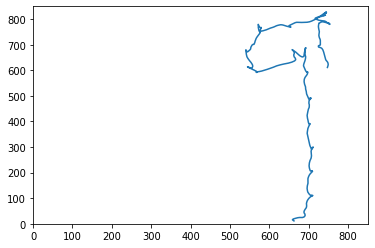

8.20S3C2M1


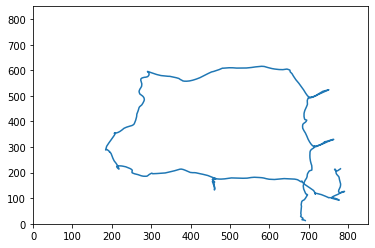

8.19S2C1M0


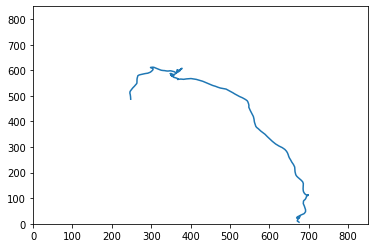

8.12S1C2M0


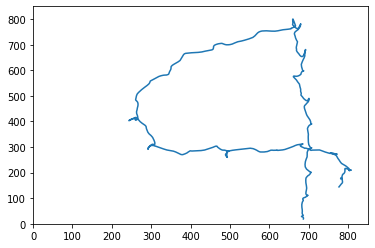

8.20S1C1M0


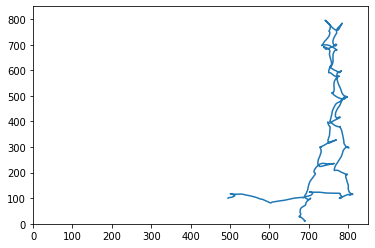

8.19S3C3M1


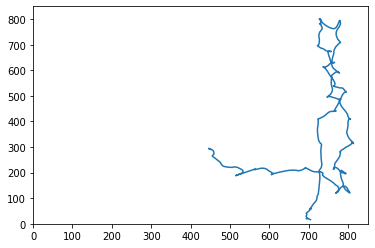

8.22S1C3M0


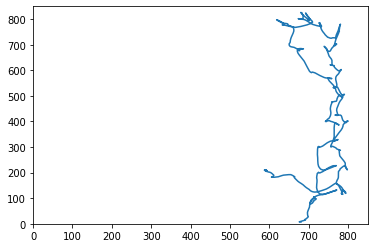

8.20S2C2M2


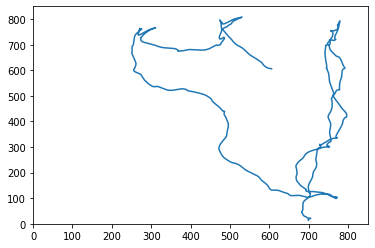

8.23S2C1M2


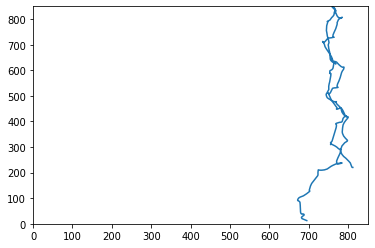

8.22S2C3M2


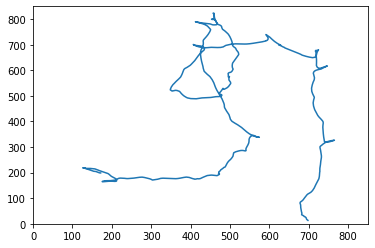

8.26S2C3M1


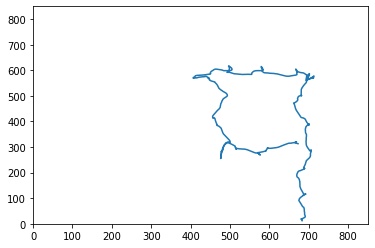

8.19S3C1M1


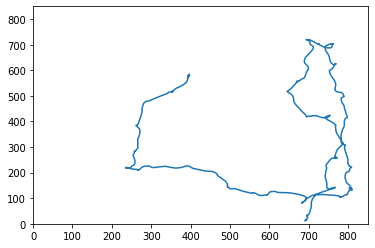

8.23S1C3M2


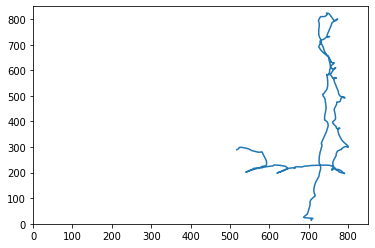

8.21S2C3M0


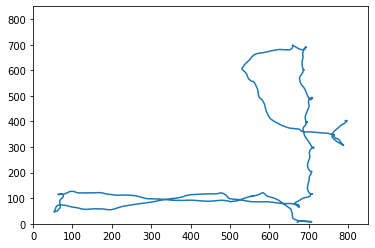

8.12S1C1M2


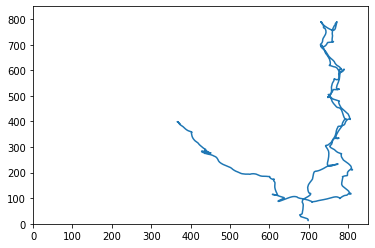

8.21S3C3M2


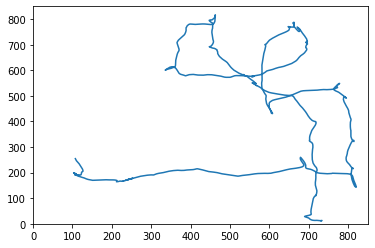

8.26S2C3M0


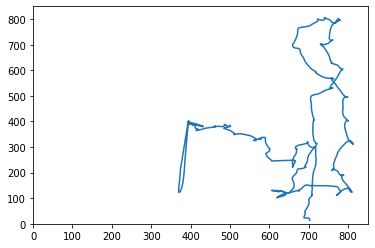

8.21S3C3M0


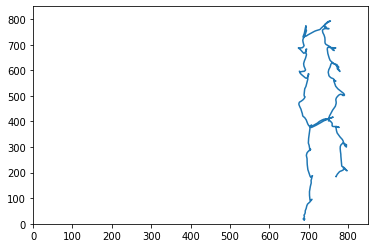

8.19S3C2M2


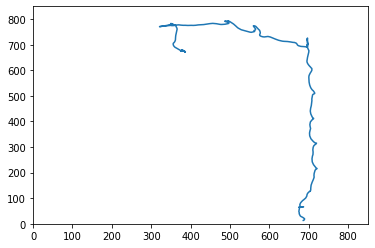

8.22S2C2M0


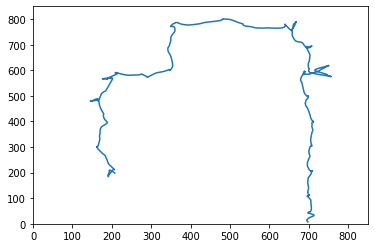

8.13S2C2M1


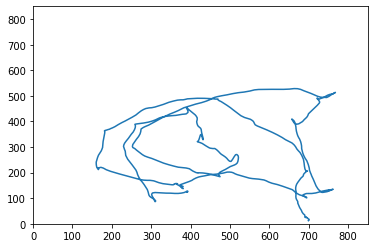

8.19S1C1M2


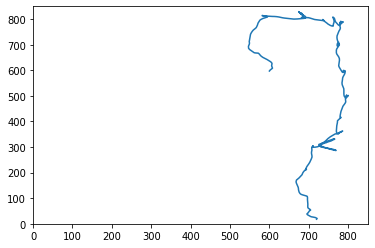

8.16S2C2M1


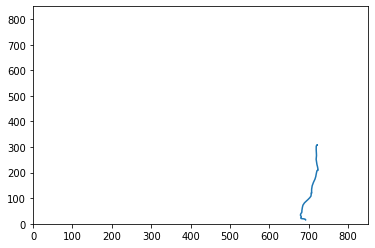

8.22S2C3M1


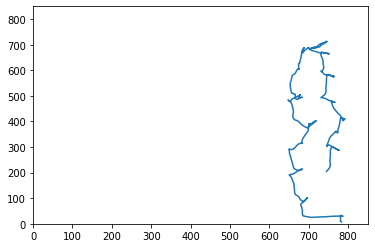

8.13S2C2M2


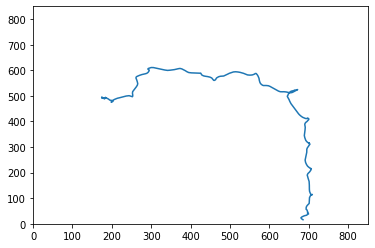

8.14S1C2M0


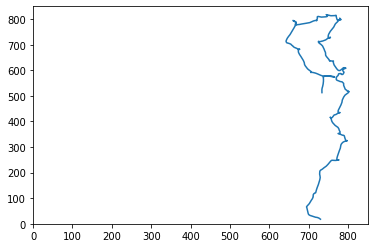

8.14S2C3M0


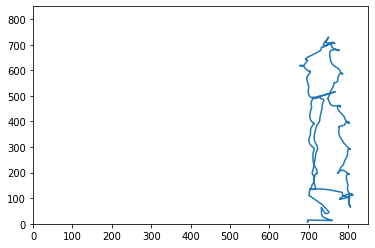

8.8S2C3M1


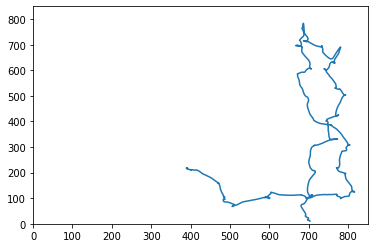

8.21S2C3M2


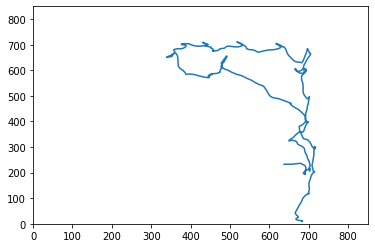

8.23S2C2M2


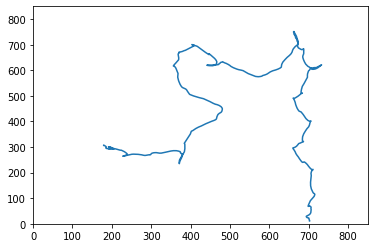

8.23S2C3M0


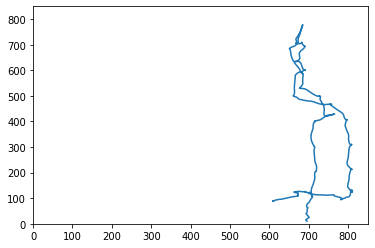

8.20S3C3M2


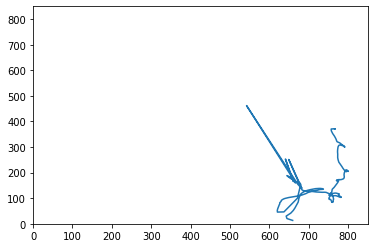

8.12S1C3M9


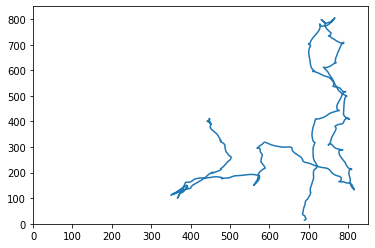

8.22S3C3M0


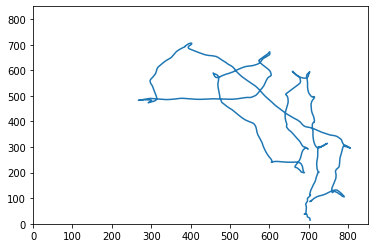

8.16S1C3M1


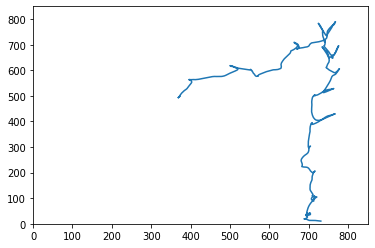

8.21S3C2M2


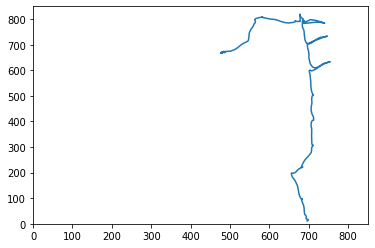

8.22S2C2M1


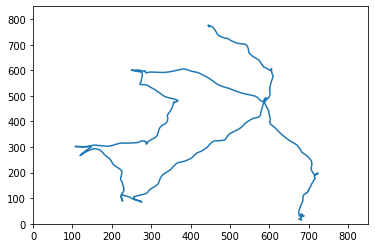

8.26S1C2M0


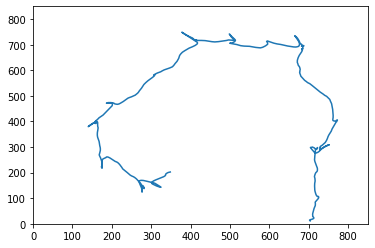

8.26S2C2M2


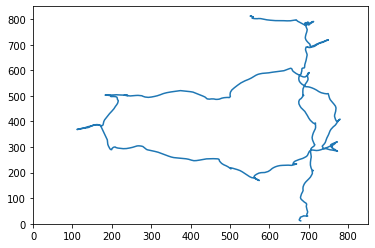

8.14S2C1M2


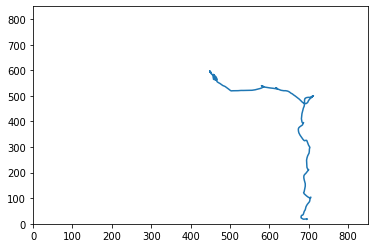

8.23S1C2M2


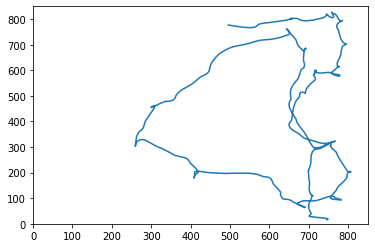

8.16S1C1M0


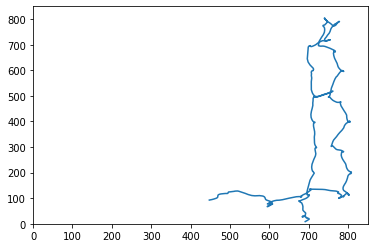

8.20S1C3M1


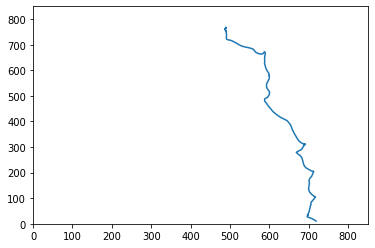

8.14S2C2M0


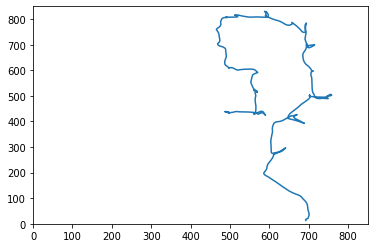

8.27S1C2M1


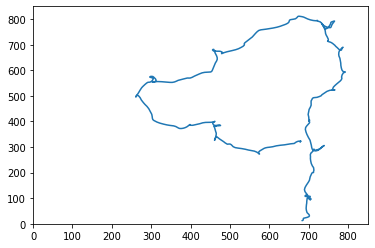

8.19S3C1M0


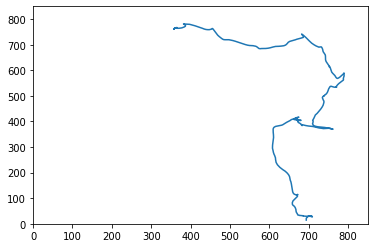

8.20S2C1M2


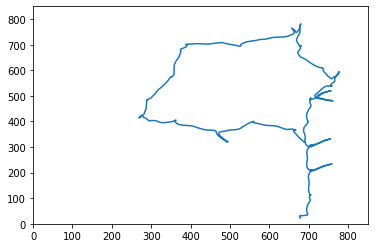

8.19S2C2M1


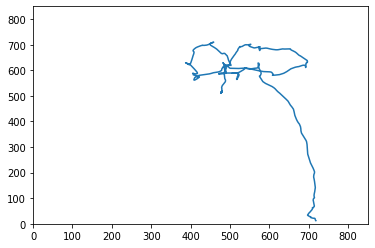

8.27S1C1M0


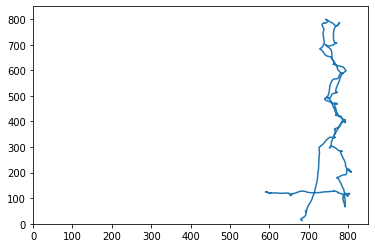

8.21S1C3M0


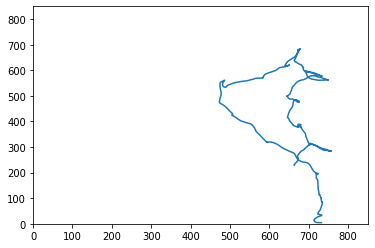

8.13S1C1M1


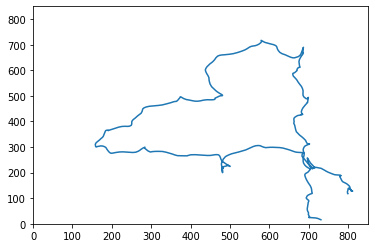

8.14S1C3M0


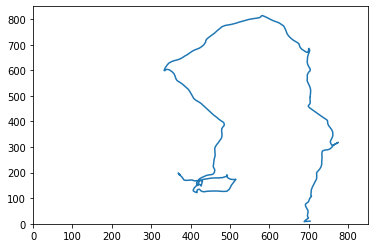

8.21S2C1M2


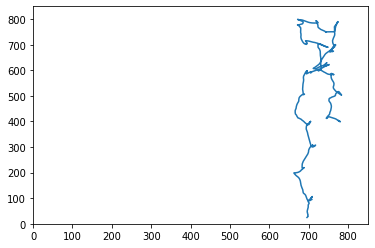

8.14S1C2M2


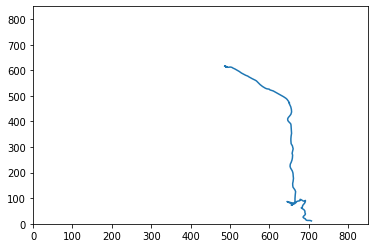

8.22S2C1M1


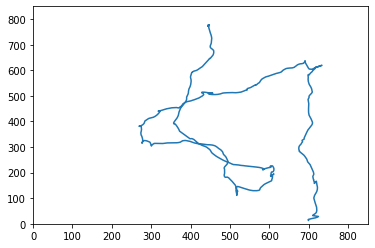

8.26S1C3M0


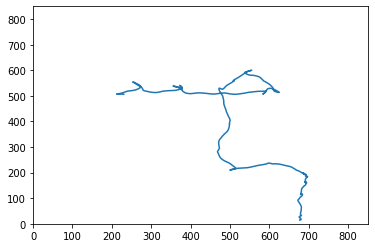

8.26S1C2M1


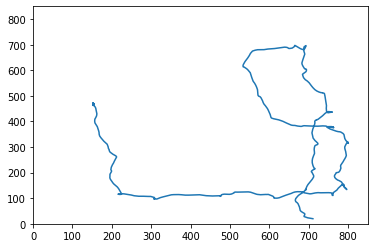

8.14S1C1M2


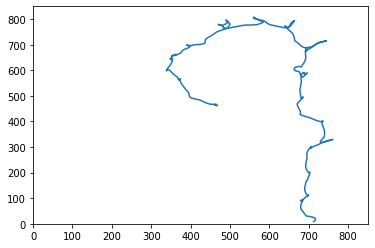

8.12S2C2M2


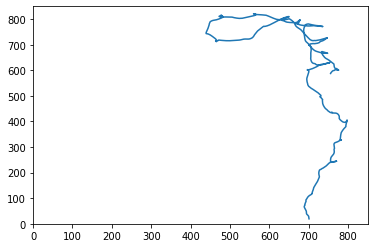

8.14S3C1M2


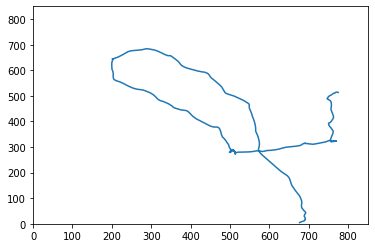

8.8S2C1M0


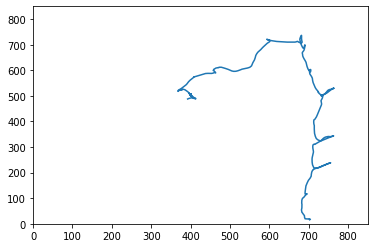

8.22S3C2M1


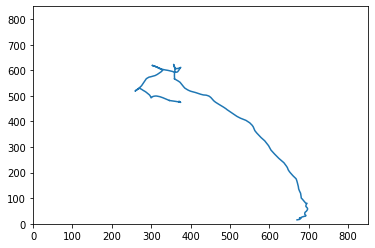

8.22S3C1M1


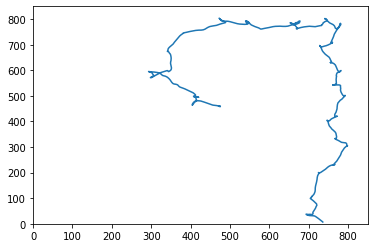

8.12S2C3M0


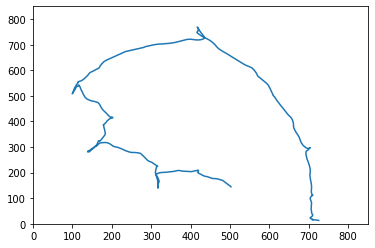

8.27S1C2M0


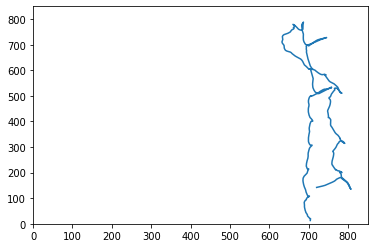

8.22S1C2M1


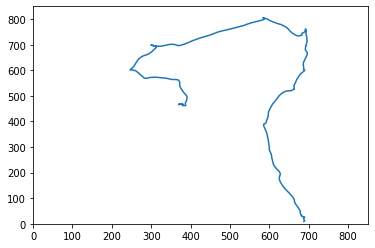

8.21S3C1M2


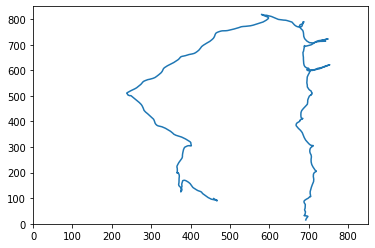

8.16S2C2M0


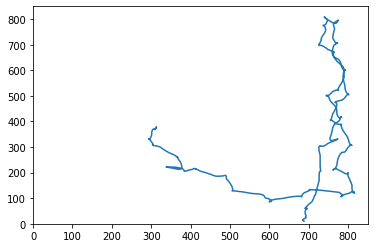

8.21S3C3M1


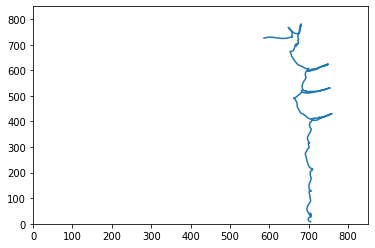

8.13S3C2M0


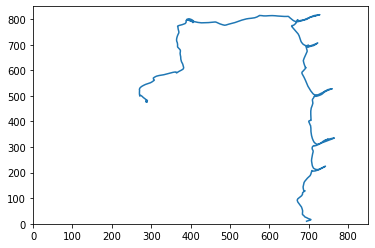

8.21S3C1M0


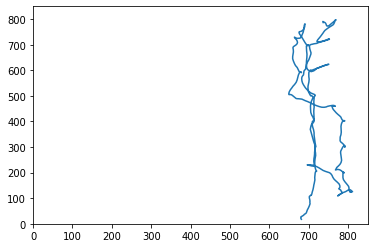

8.16S2C3M1


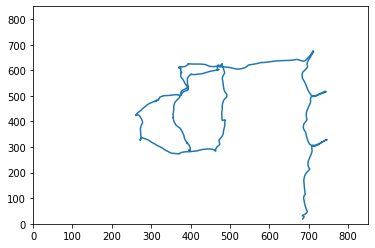

8.23S1C2M1


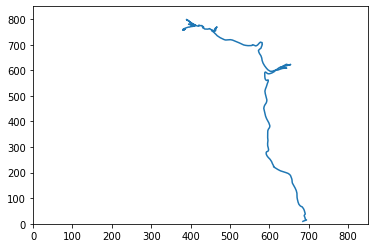

8.20S2C1M1


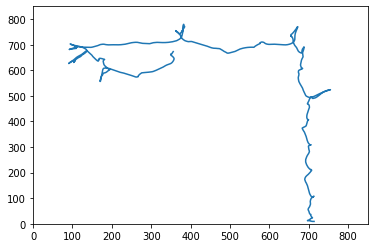

8.21S2C2M0


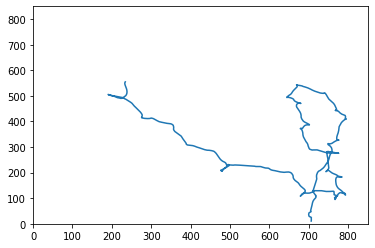

8.13S3C3M0


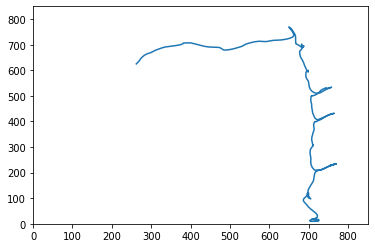

8.21S3C2M1


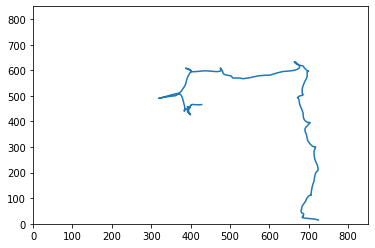

8.27S1C3M1


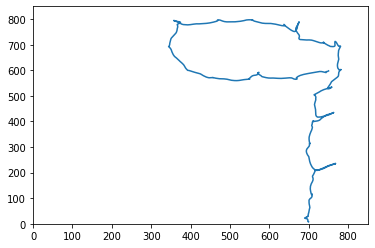

8.13S3C2M1


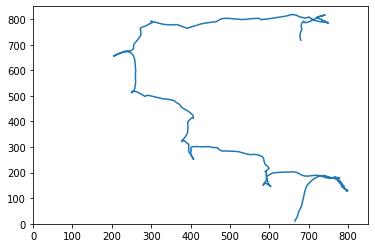

8.22S1C1M0


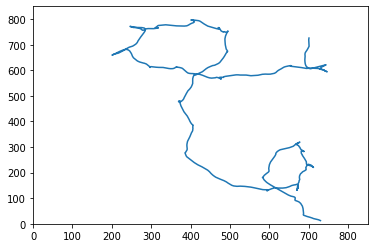

8.26S2C2M1


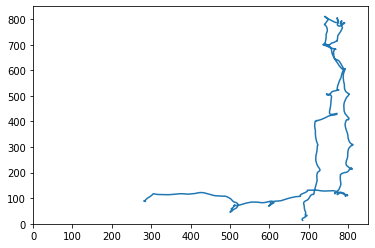

8.22S1C3M1


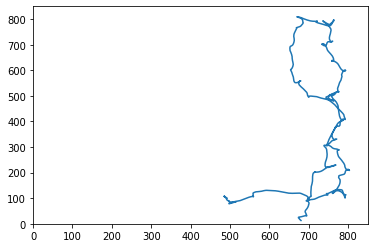

8.19S1C3M2


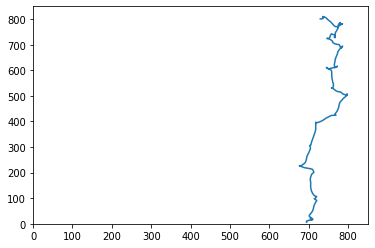

8.13S1C3M0


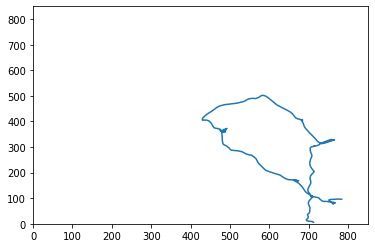

8.13S2C1M2


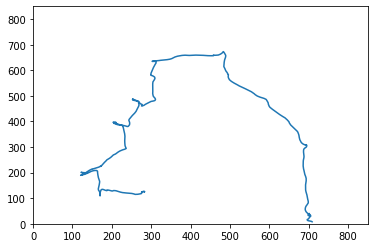

8.13S1C2M0


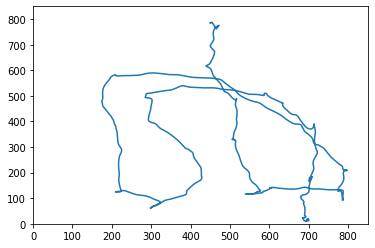

8.26S1C3M1


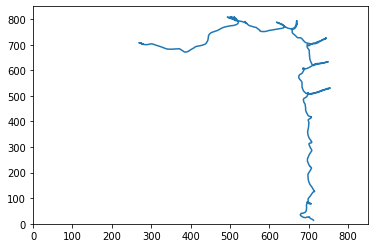

8.14S3C2M0


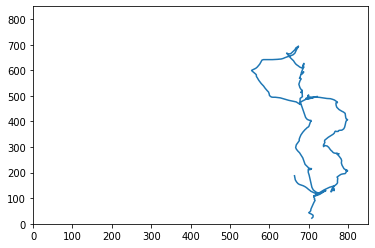

8.14S1C1M0


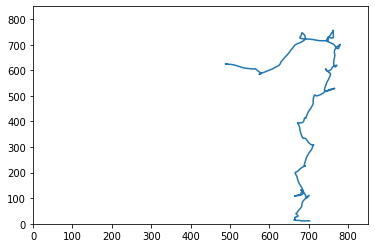

8.22S2C2M2


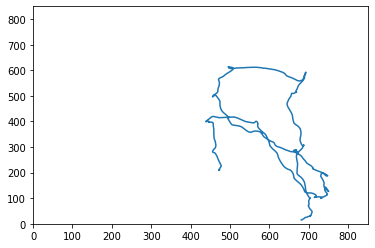

8.19S1C1M1


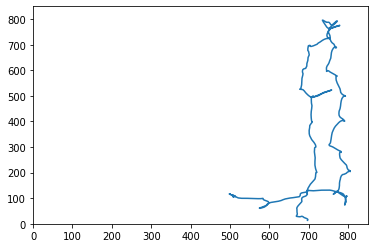

8.19S1C3M1


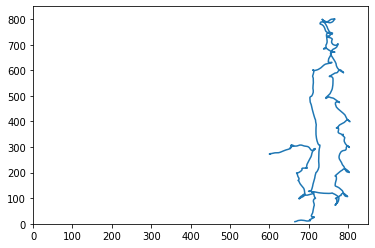

8.20S2C3M0


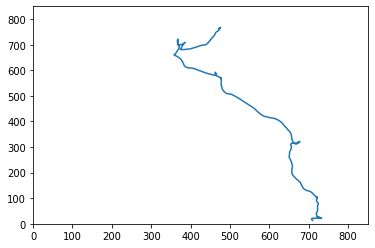

8.14S2C1M1


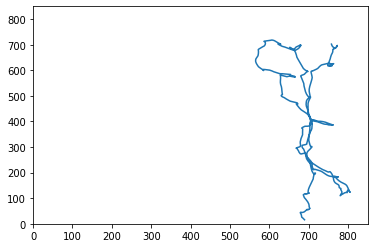

8.16S1C3M2


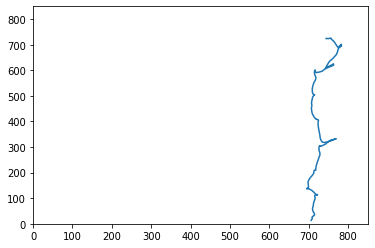

8.14S1C3M1


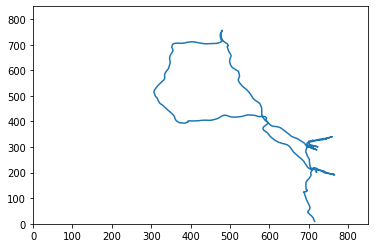

8.8S1C2M0


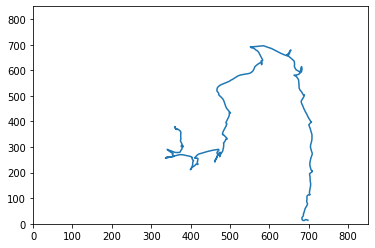

8.21S3C1M1


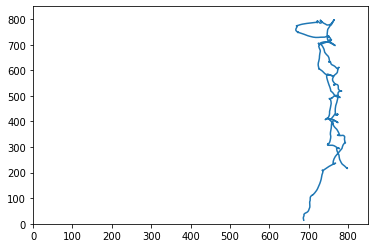

8.16S2C3M0


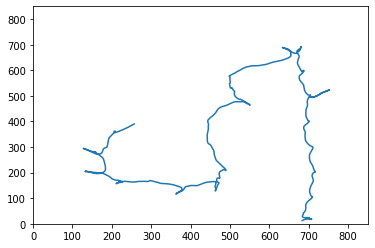

8.19S2C2M0


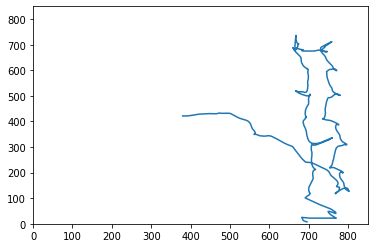

8.8S1C3M1


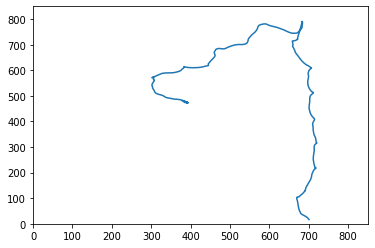

8.22S3C2M0


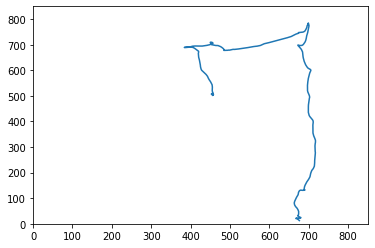

8.27S1C3M2


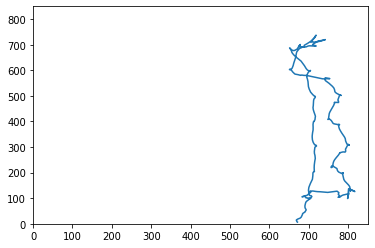

8.13S3C3M2


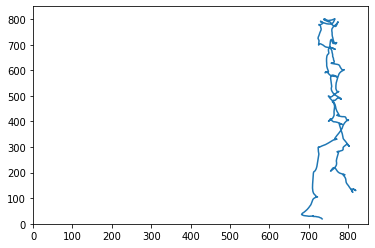

8.20S1C3M0


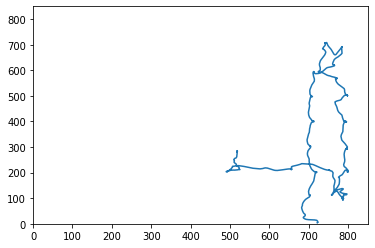

8.13S2C3M1


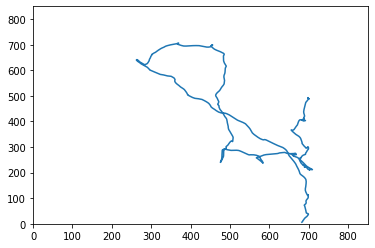

8.8S1C1M1


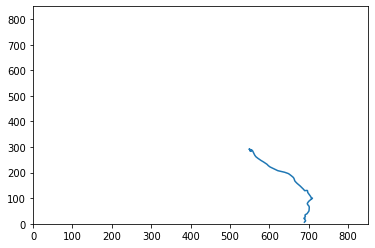

8.13S2C1M1


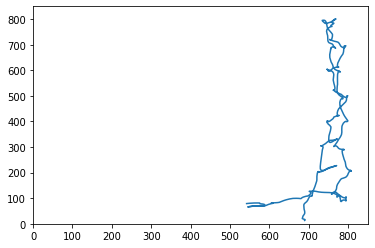

8.20S3C3M1


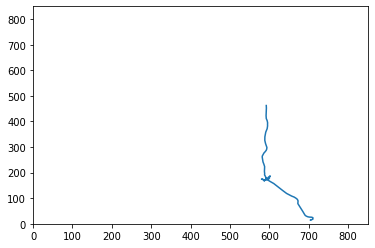

8.22S2C1M0


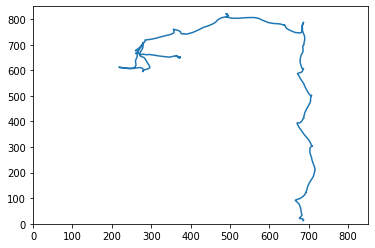

8.22S2C1M2


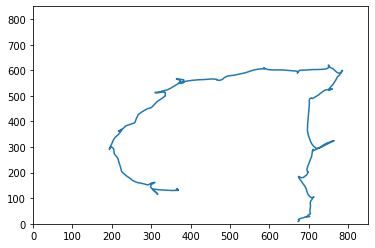

8.19S1C2M2


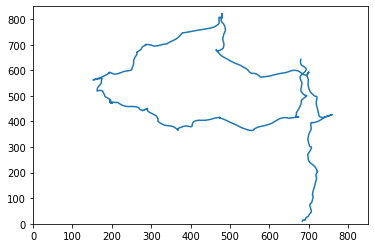

8.20S3C1M2


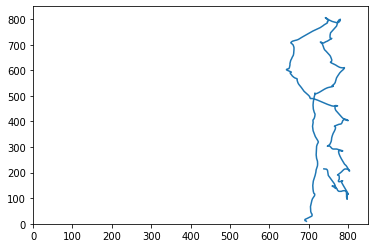

8.22S2C3M0


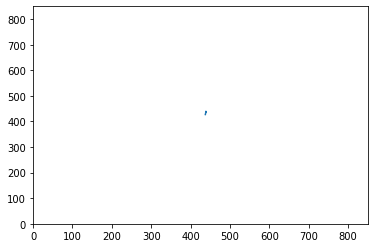

8.14S3C1M0


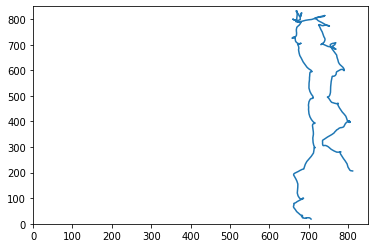

8.19S3C3M2


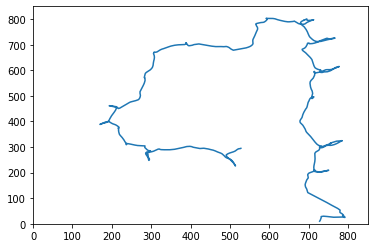

8.8S1C1M0


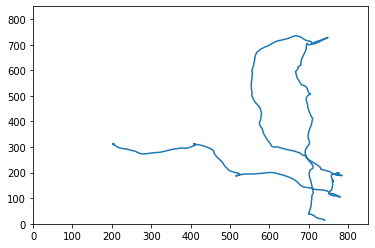

8.23S2C1M0


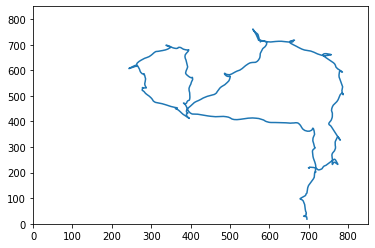

8.26S2C1M2


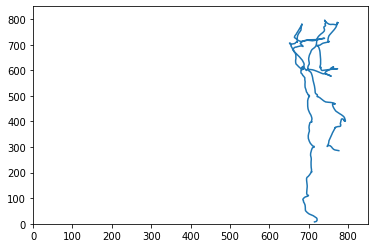

8.13S2C3M2


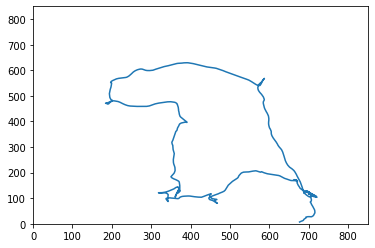

8.13S2C2M0


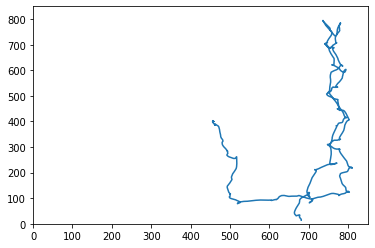

8.22S3C3M2


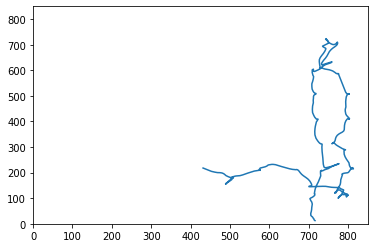

8.14S2C3M1


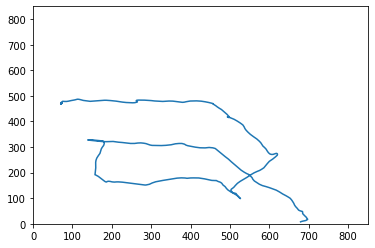

8.16S2C1M2


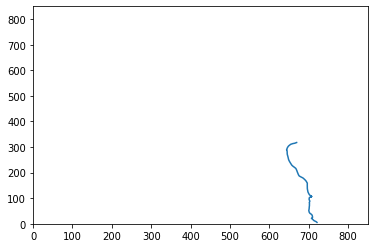

8.13S2C1M0


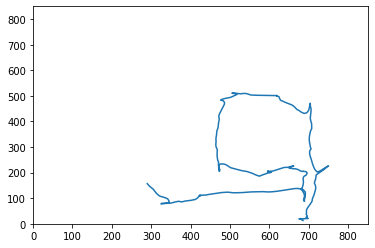

8.26S1C2M2


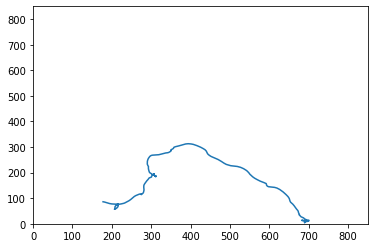

8.8S1C1M2


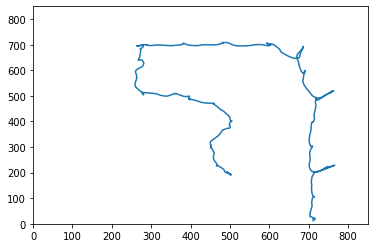

8.21S1C2M1


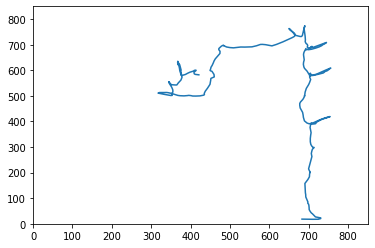

8.19S3C2M1


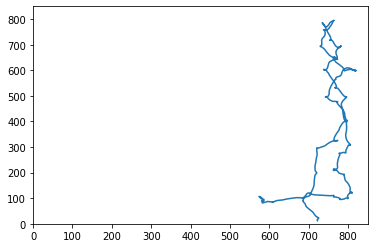

8.21S1C3M2


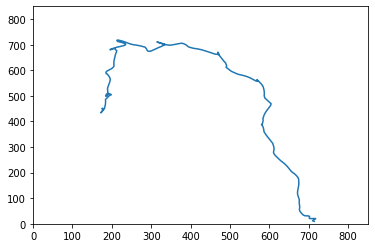

8.26S2C1M0


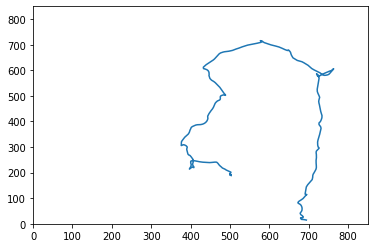

8.21S1C1M2


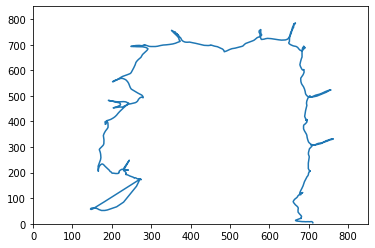

8.13S1C2M1


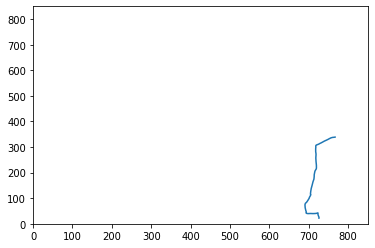

8.23S1C3M1


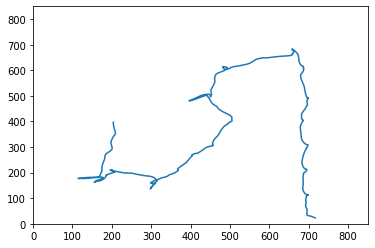

8.19S1C2M0


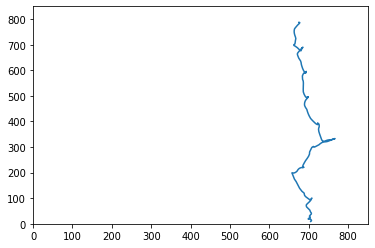

8.14S2C2M2


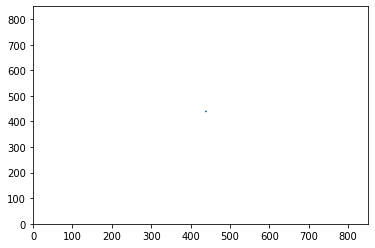

8.21S1C1M0


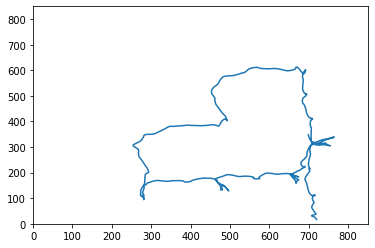

8.14S1C2M1


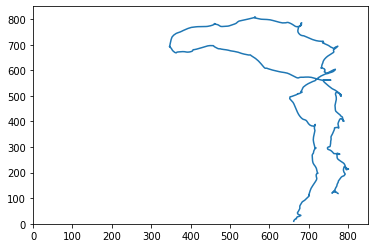

8.19S3C1M2


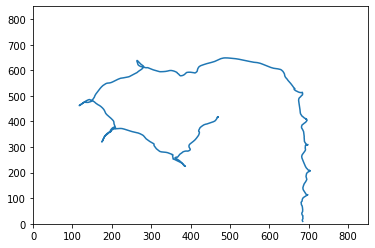

8.12S2C2M0


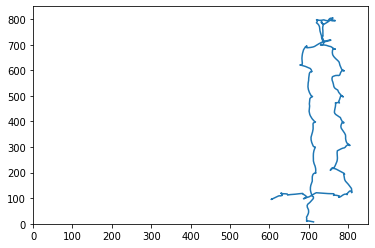

8.20S2C3M2


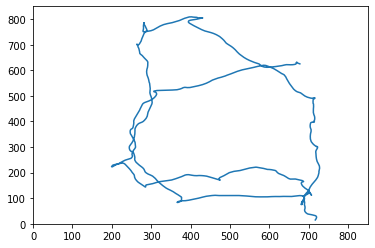

8.16S1C1M2


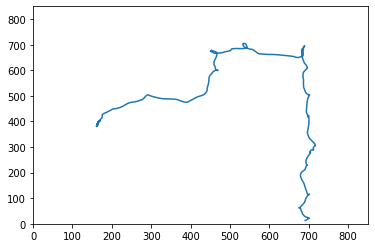

8.23S2C2M0


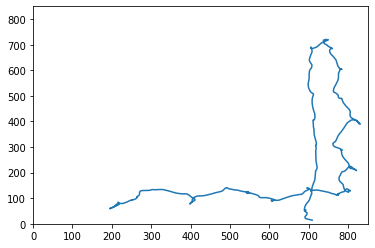

8.23S2C1M1


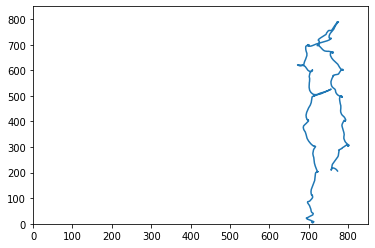

8.13S3C3M1


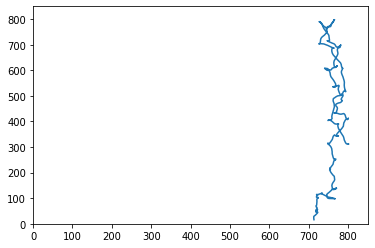

8.16S2C3M2


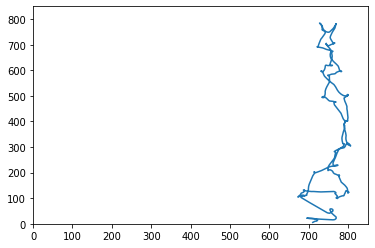

8.12S1C3M2


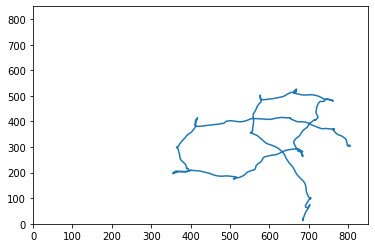

8.16S1C1M1


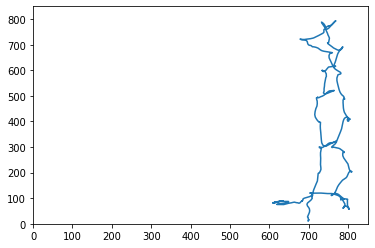

8.20S2C3M1


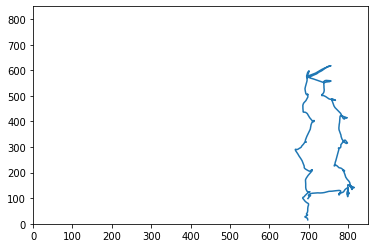

8.14S3C2M2


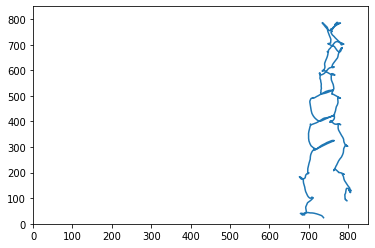

8.20S1C2M2


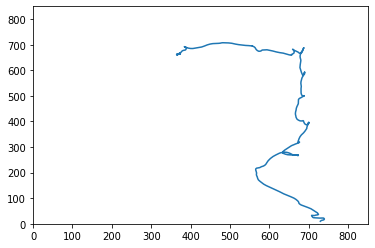

8.12S1C2M1


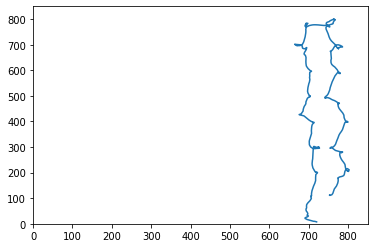

8.13S1C3M1


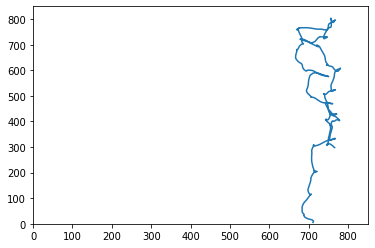

8.13S3C2M2


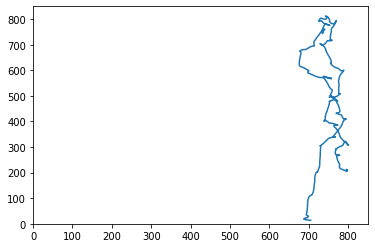

8.19S1C3M0


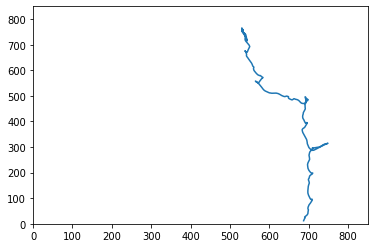

8.20S1C1M1


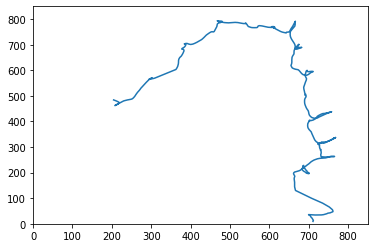

8.8S1C2M1


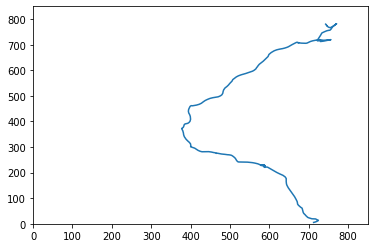

8.8S2C1M2


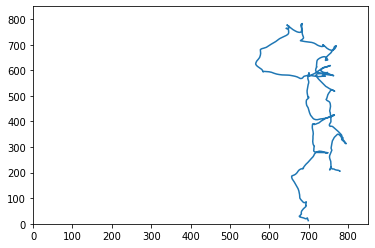

8.20S2C2M1


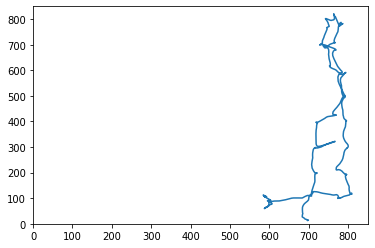

8.21S1C3M1


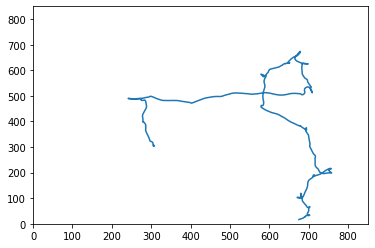

8.21S2C1M1


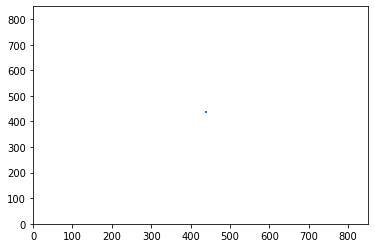

8.16S2C1M0


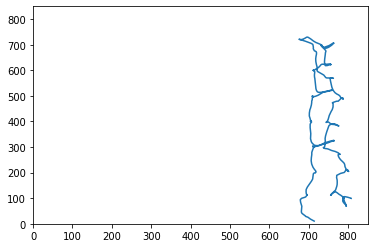

8.12S1C3M1


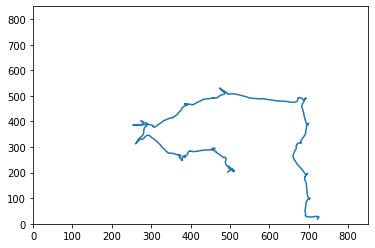

8.21S1C1M1


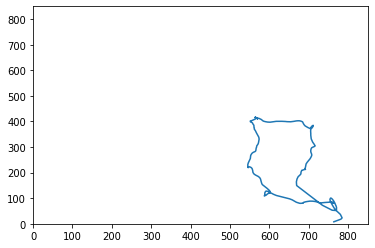

8.12S2C1M2


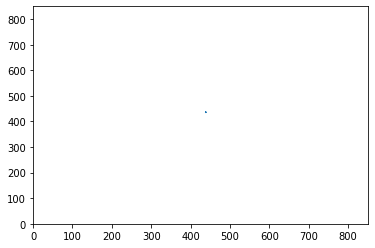

8.14S2C1M0


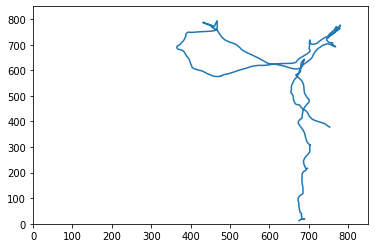

8.26S2C2M0


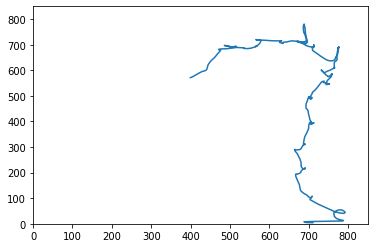

8.8S1C2M2


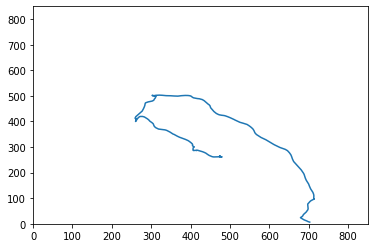

8.8S2C1M1


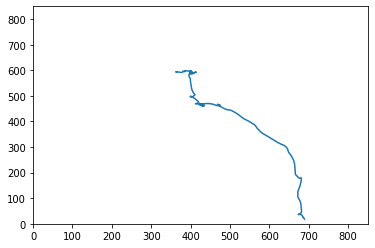

8.23S1C1M1


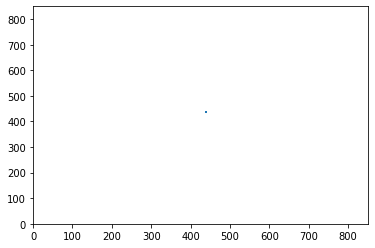

8.13S3C1M0


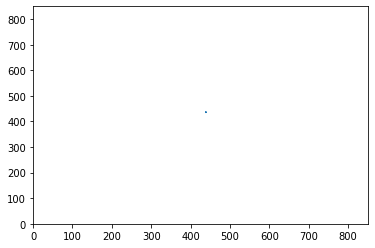

8.12S2C1M0


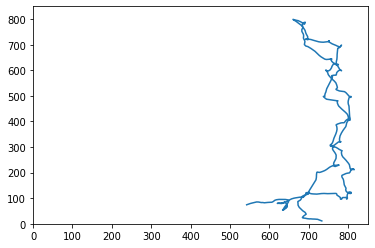

8.22S1C3M2


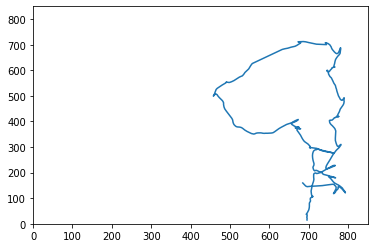

8.19S2C2M2


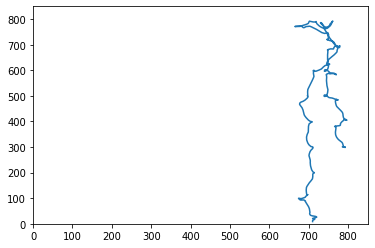

8.13S1C3M2


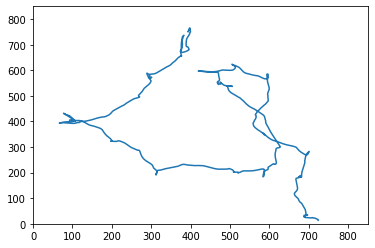

8.26S1C3M2


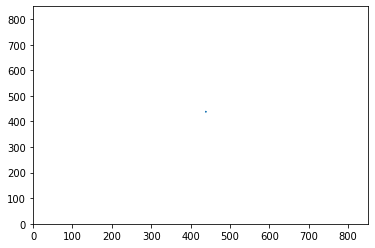

8.13S1C1M0


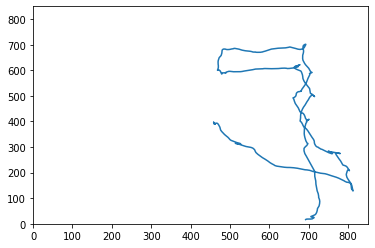

8.27S1C3M0


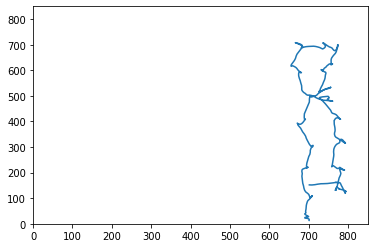

8.16S1C2M2


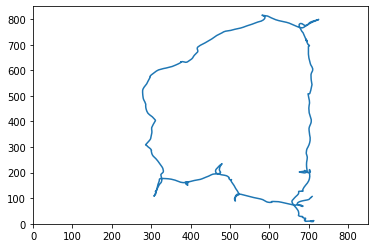

8.26S2C3M2


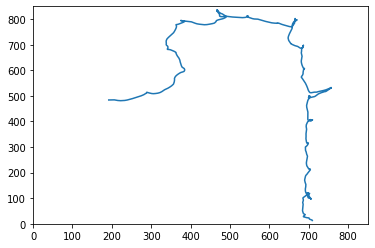

8.14S3C2M1


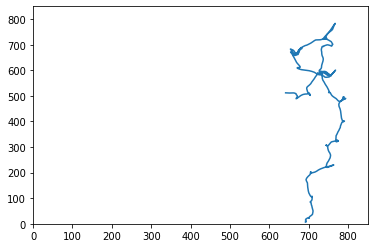

8.13S1C2M2


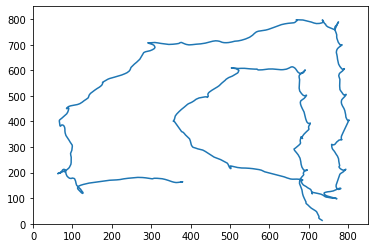

8.19S1C1M0


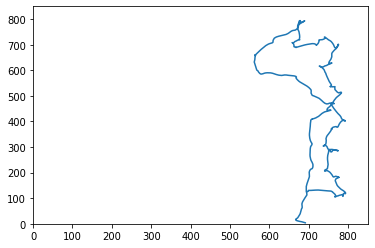

8.8S1C3M0


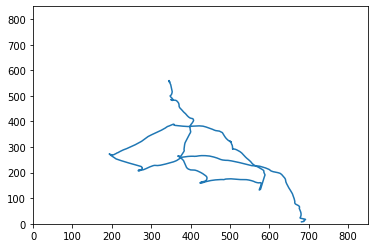

8.12S1C1M1


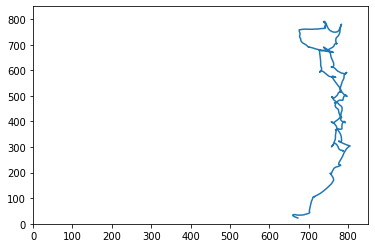

8.19S3C3M0


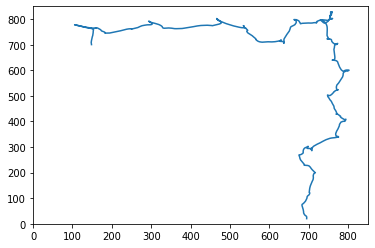

8.19S2C3M0


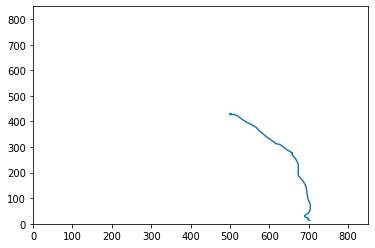

8.27S1C1M1


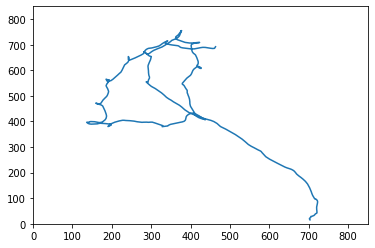

8.26S2C1M1


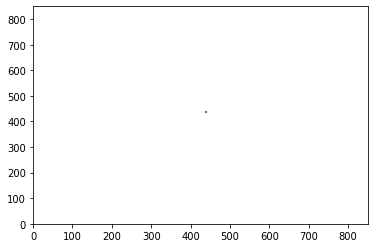

8.21S2C1M0


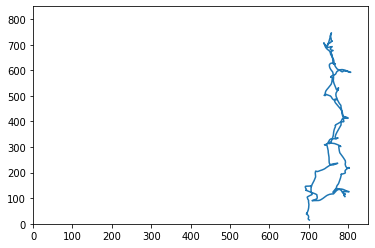

8.14S1C3M2


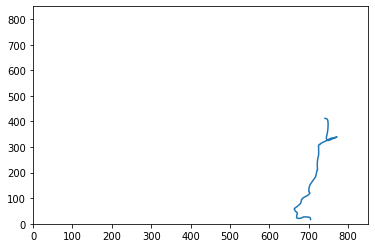

8.22S3C3M1


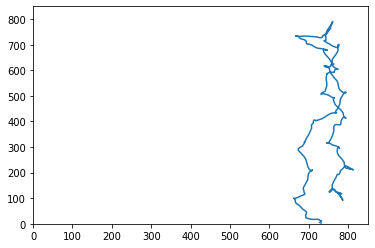

8.8S1C3M2


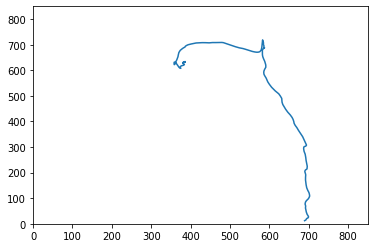

8.23S1C1M2


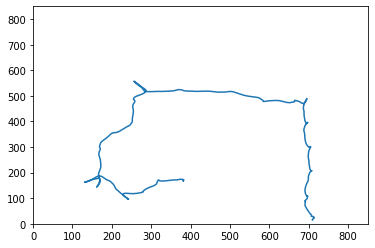

8.19S1C2M1


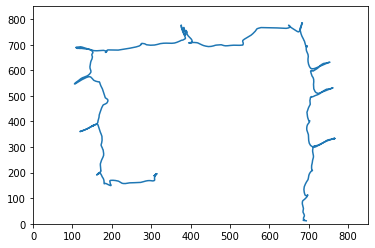

8.21S2C2M1


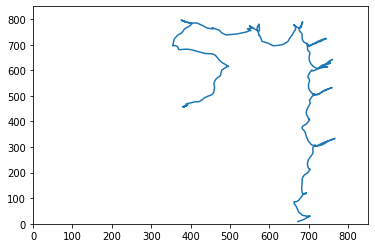

8.21S3C2M0


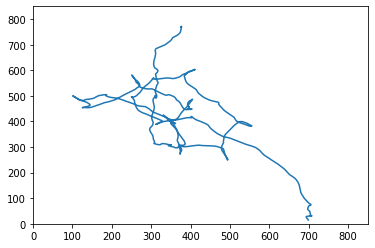

8.26S1C1M1


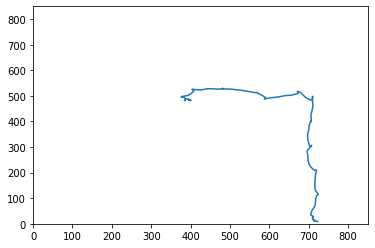

8.22S3C2M2


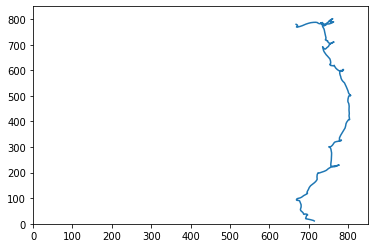

8.14S3C3M2


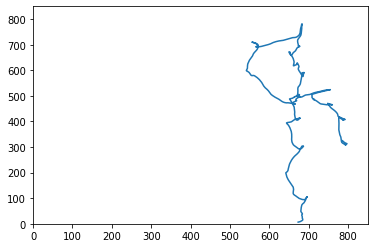

8.12S1C2M2


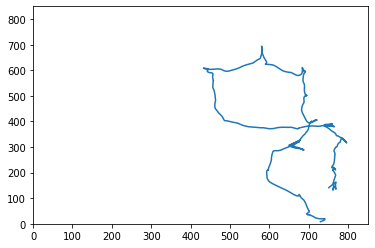

8.16S1C2M1


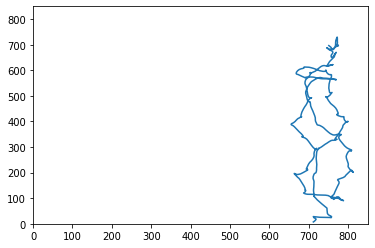

8.8S2C3M0


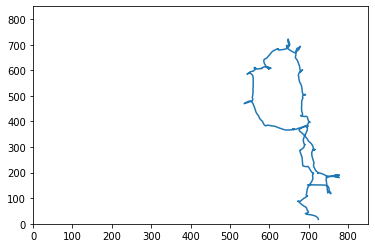

8.16S1C3M0


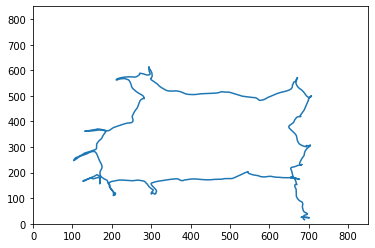

8.14S2C2M1


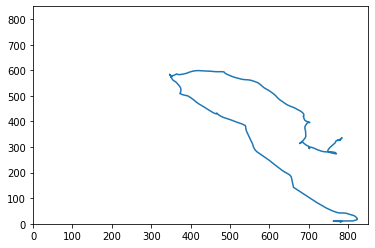

8.12S1C1M0


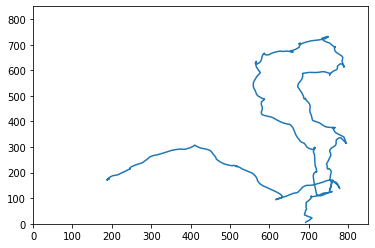

8.13S3C1M2


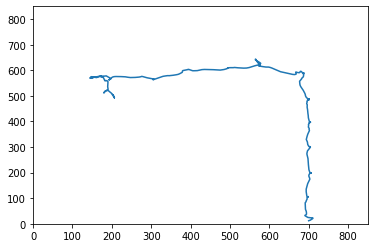

8.20S3C1M1


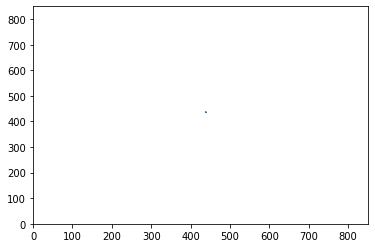

8.20S3C1M0


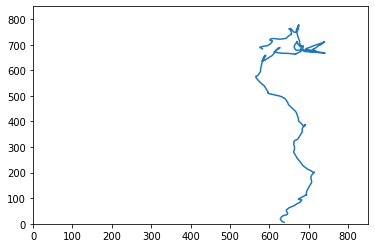

8.13S3C1M1


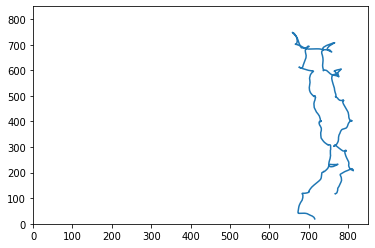

8.14S3C3M1


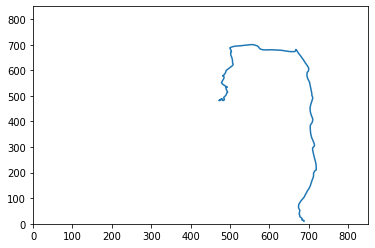

8.27S1C1M2


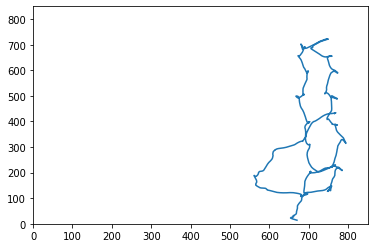

8.16S2C2M2


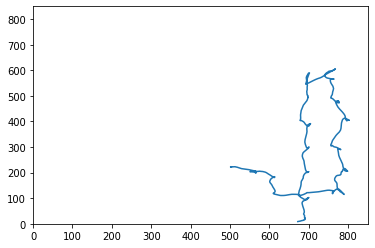

8.20S3C2M2


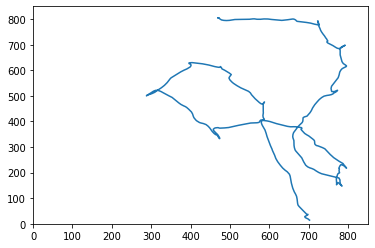

8.26S1C1M0


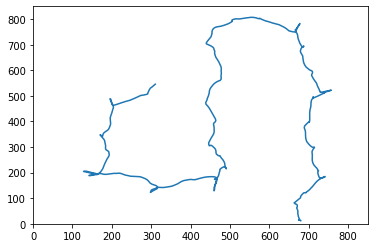

8.19S2C1M2


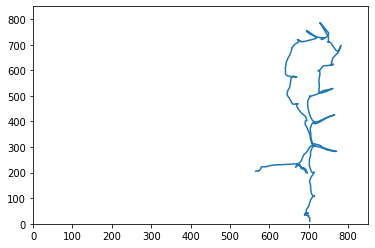

8.22S1C2M2


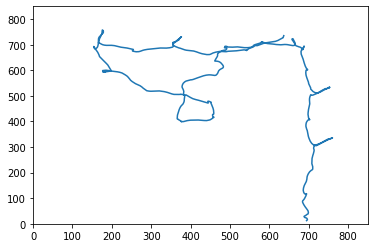

8.23S2C2M1


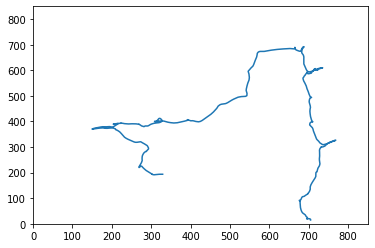

8.22S1C1M2


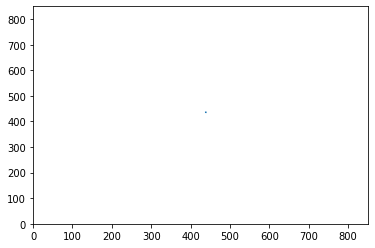

8.20S2C1M0


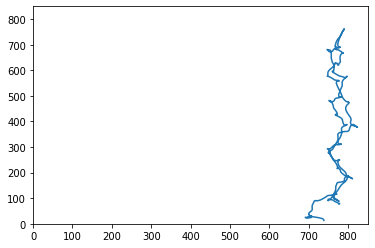

8.8S2C3M2


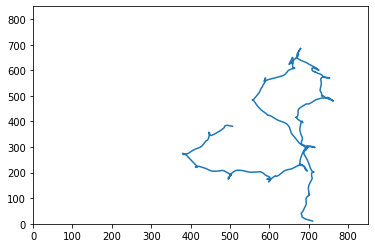

8.19S2C1M1


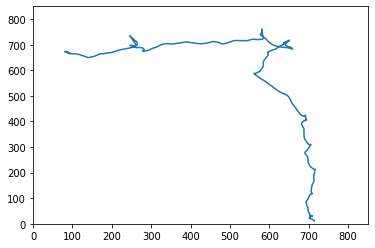

8.16S1C2M0


In [4]:
result_water, err2 = get_file_names("/home/david/Desktop/Ania/New_setup/Experiment_Ania_water", notes_table_water)
result_water2 = result_water.fillna(0)
result_water = result_water2.loc[(result_water2['exploitation_time'] > 0)]


Plot time spend on exploitation vs amount of water

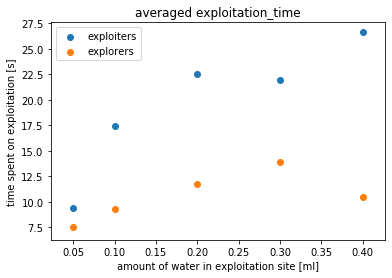

In [76]:

def plot_water_one_plot(data_table , mice_type):
    if mice_type == "exploiters":
        mice_numb = [(2,2), (3,0), (3,1), (3,2)]
    elif mice_type == "explorers":
        mice_numb= [(1,0), (1,1), (1,2), (2,0), (2,1)]
    
    for j, i in mice_numb:
        print("cage", j, "mice", i, )
        cage_number = j
        mice_number = i
        data = result_water.loc[(result_water['cage'] == cage_number)&(result_water['mice'] == mice_number)&(result_water['found'] != 1)]
        plot_time_exp_vs_water(data, mice_type)
    plt.show()
def plot_time_exp_vs_water(data, mice_type):  
    water = data['water_exploitation']
    exploitation_time = data['exploitation_time']
    plt.scatter(water, exploitation_time)
    plt.title("exploitation_time -" + " " + mice_type)
    plt.xlabel("amount of water in exploitation site [ml]")
    plt.ylabel("time spent on exploitation [s]")
    plt.xlim(0,0.5)
    plt.ylim(0,35)
def plot_mean_water(data, mice_type): 
    if mice_type == "exploiters":
        mice_numb = [(2,2), (3,0), (3,1), (3,2)]
    elif mice_type == "explorers":
        mice_numb= [(1,0), (1,1), (1,2), (2,0), (2,1)]
    water_amount = [ 0.05, 0.1, 0.2, 0.3, 0.4]
    lists = []
    for k in water_amount:
        time_exploit = 0
        num = 0
        for j, i in mice_numb:
            cage_number = j
            mice_number = i
            data = result_water.loc[(result_water['cage'] == cage_number)&(result_water['mice'] == mice_number)&(result_water['water_exploitation'] == k)]
            time_exploit = time_exploit + data['exploitation_time'].sum()
            num = num + len(data['exploitation_time'])
#             print(data['exploitation_time'].sum())
#             print(len(data['exploitation_time']))
        aver = time_exploit/num
        
        lists.append(aver)
    plt.title("averaged exploitation_time" )
    plt.xlabel("amount of water in exploitation site [ml]")
    plt.ylabel("time spent on exploitation [s]")
    plt.scatter(water_amount, lists, label= mice_type)
    plt.legend()
        
 
    
# plot_water_one_plot(result_water, "exploiters")
# plot_water_one_plot(result_water , "explorers")

plot_mean_water(result_water, "exploiters")
plot_mean_water(result_water, "explorers")


## Experiments with lesioned mice

2 mice - 1 exploiter, 1 explorer had lesion of dorsolateral striatum performed.
1. Mice were given 30 s to drink water from the grid. The amount of water in exploitation site was increased from 0.1 ml to 0.4 ml.
There weren't any differences observed between the lesioned mice and the control group. Both the time they spent on exploitation, speed with which they moved and behaviour seemed to be the same. 
2. Mice were given 5 min to drink water from the grid. They all kept exploring. No differences werer observed between the two groups.


['9.2S1C2M1', '9.3S1C1M2', '9.5S1C2M1', '9.3S3C3M2', '9.3S2C2M0', '9.3S3C3M1', '9.3S3C2M0', '9.4S1C2M2', '9.4S1C3M2', '9.3S1C1M0', '9.4S1C3M1', '9.4S3C3M0', '9.4S1C1M1', '9.3S2C3M1', '9.3S3C1M2', '9.4S3C3M2', '9.3S2C2M2', '9.4S2C1M2', '9.3S3C2M2', '9.4S2C1M1', '9.4S3C1M0', '9.2S1C2M0', '9.3S2C3M0', '9.3S2C2M1', '9.3S1C2M1', '9.4S2C2M1', '9.4S1C3M0', '9.3S2C1M0', '9.4S2C3M0', '9.4S3C3M1', '9.2S1C3M0', '9.3S3C1M0', '9.4S1C2M1', '9.3S3C2M1', '9.3S1C1M1', '9.4S2C3M2', '9.3S1C2M0', '9.3S3C3M0', '9.4S3C1M2', '9.3S2C1M2', '9.5S1C1M1', '9.3S1C3M2', '9.5S1C1M2', '9.2S1C1M2', '9.4S1C2M0', '9.4S2C2M2', '9.4S3C2M1', '9.5S1C2M0', '9.2S1C2M2', '9.4S1C1M0', '9.4S2C1M0', '9.3S1C3M0', '9.2S1C3M2', '9.4S3C2M0', '9.2S1C1M1', '9.4S2C3M1', '9.5S1C2M2', '9.4S3C1M1', '9.2S1C3M1', '9.2S1C1M0', '9.5S1C1M0', '9.5S1C3M1', '9.3S1C2M2', '9.3S2C3M2', '9.4S1C1M2', '9.4S2C2M0', '9.5S1C3M2', '9.5S1C3M0', '9.4S3C2M2', '9.3S1C3M1', '9.3S2C1M1', '9.3S3C1M1']


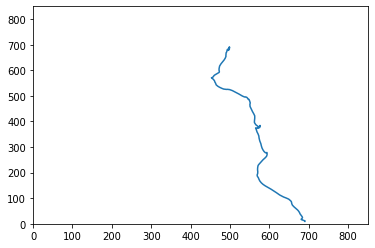

9.2S1C2M1


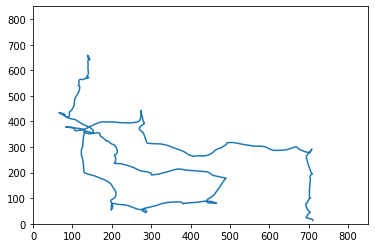

9.3S1C1M2


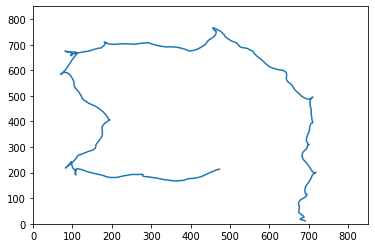

9.3S2C2M0


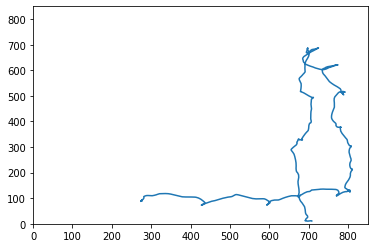

9.3S3C3M1


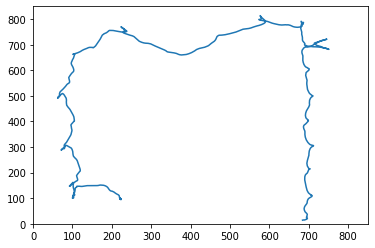

9.3S3C2M0


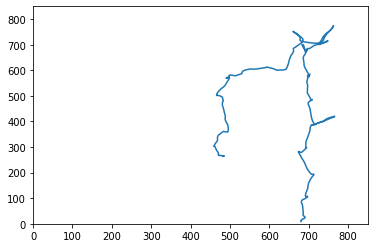

9.4S1C2M2


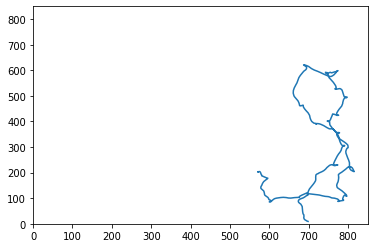

9.4S1C3M2


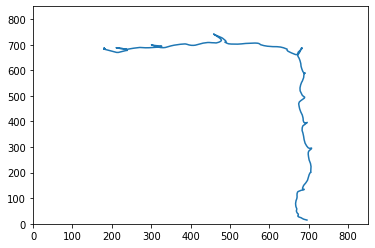

9.3S1C1M0


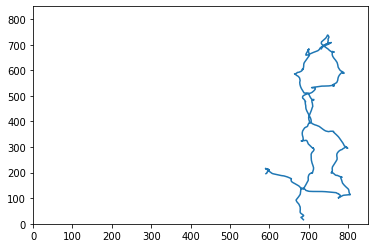

9.4S1C3M1


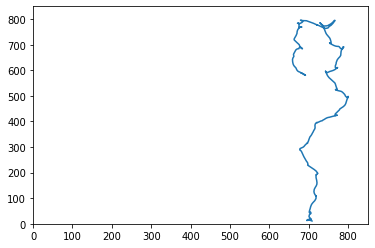

9.4S3C3M0


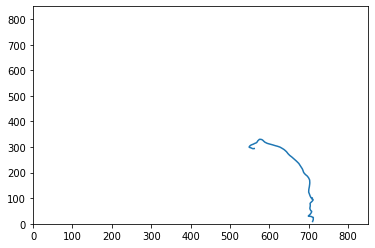

9.4S1C1M1


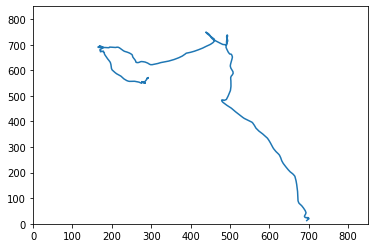

9.3S2C3M1


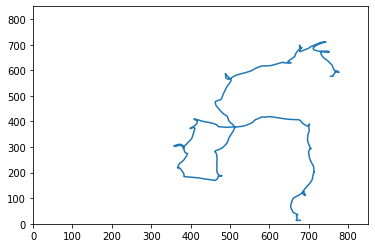

9.3S3C1M2


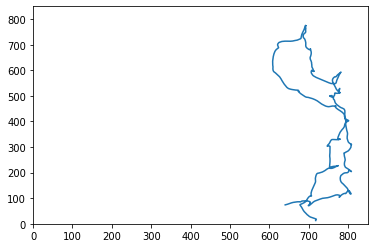

9.4S3C3M2


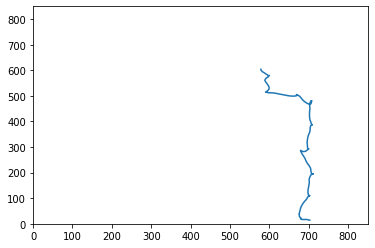

9.3S2C2M2


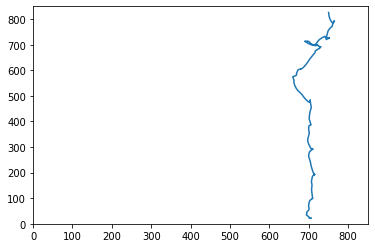

9.4S2C1M2


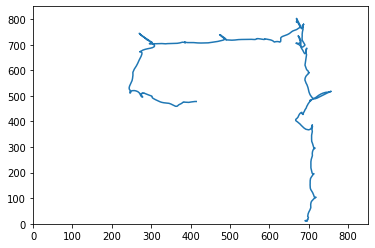

9.3S3C2M2


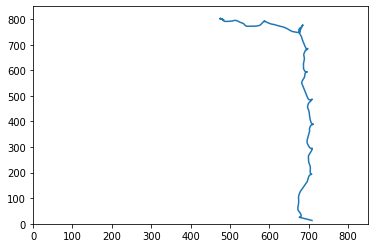

9.4S3C1M0


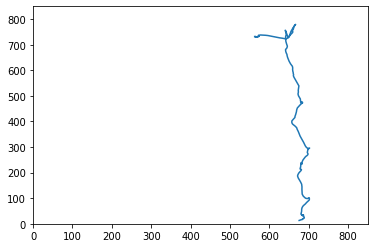

9.2S1C2M0


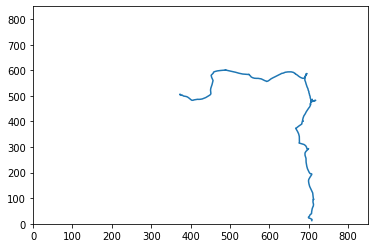

9.3S2C3M0


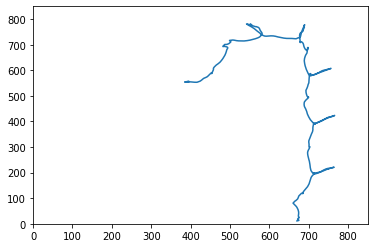

9.3S2C2M1


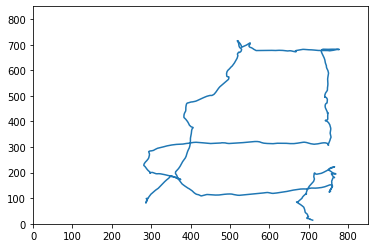

9.3S1C2M1


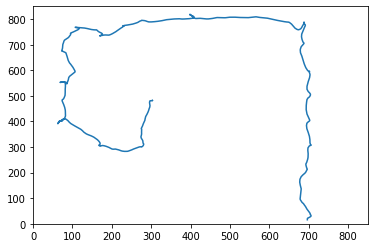

9.3S2C1M0


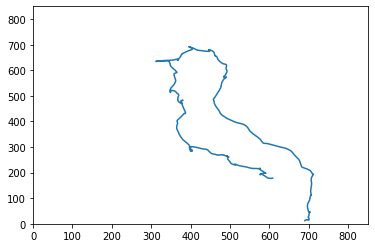

9.4S2C3M0


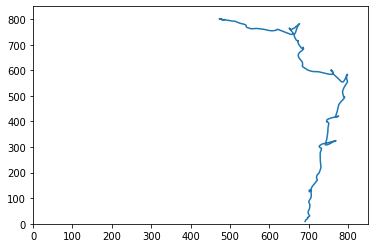

9.4S3C3M1


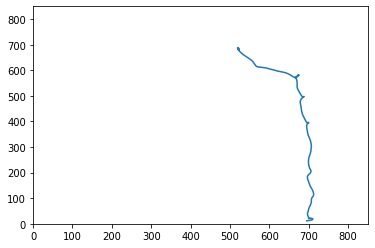

9.2S1C3M0


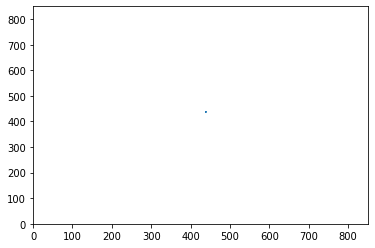

9.3S3C1M0


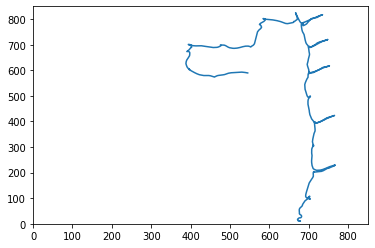

9.3S3C2M1


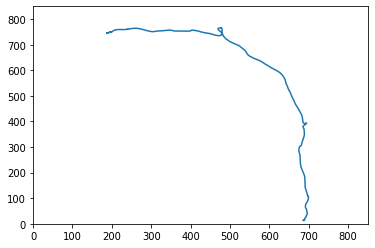

9.3S1C1M1


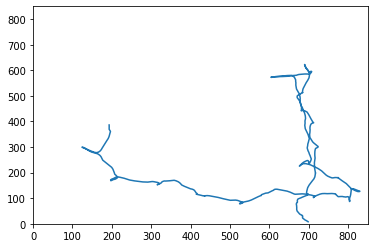

9.4S2C3M2


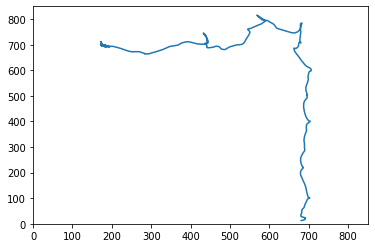

9.3S1C2M0


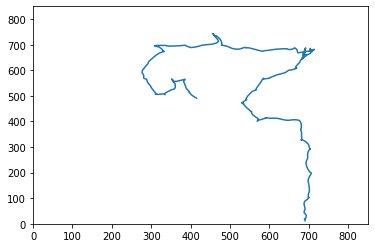

9.3S3C3M0


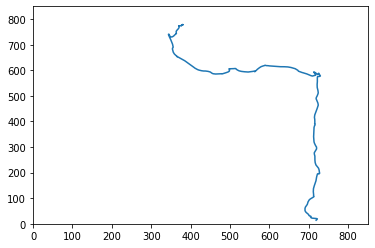

9.4S3C1M2


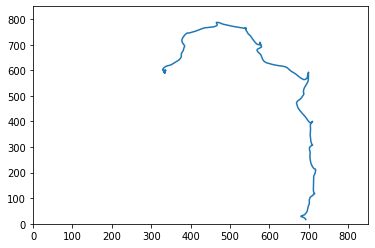

9.3S2C1M2


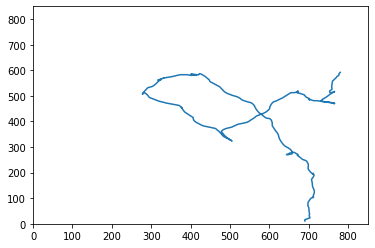

9.5S1C1M1


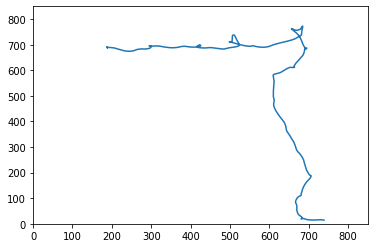

9.3S1C3M2


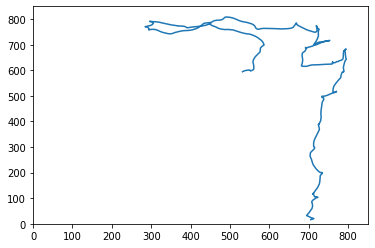

9.5S1C1M2


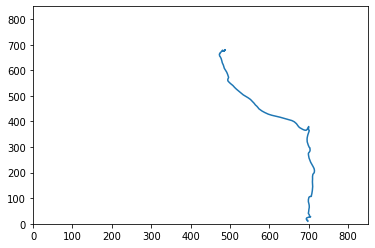

9.2S1C1M2


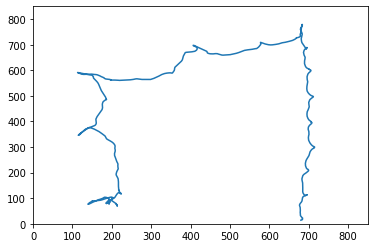

9.4S1C2M0


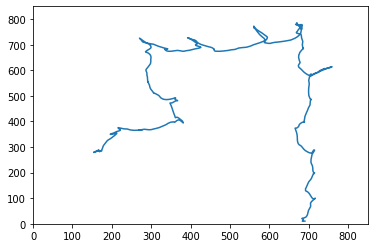

9.4S2C2M2


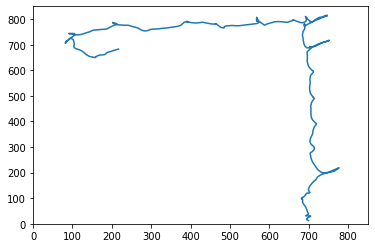

9.5S1C2M0


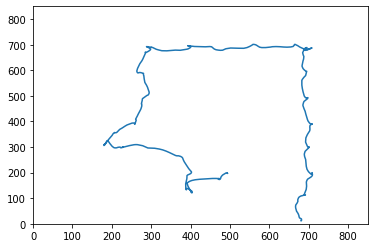

9.4S1C1M0


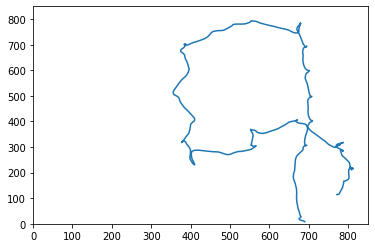

9.4S2C1M0


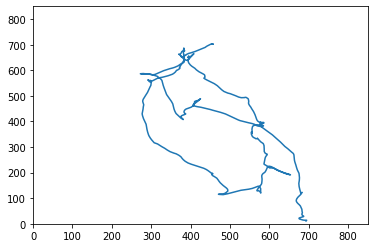

9.2S1C3M2


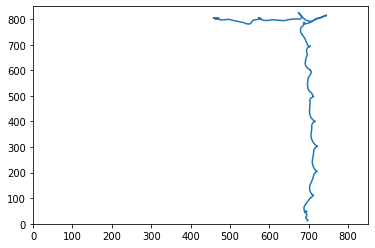

9.4S3C2M0


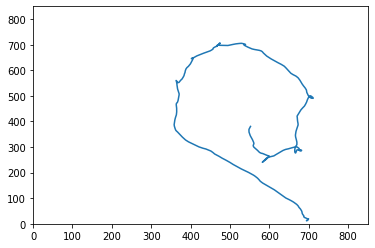

9.2S1C1M1


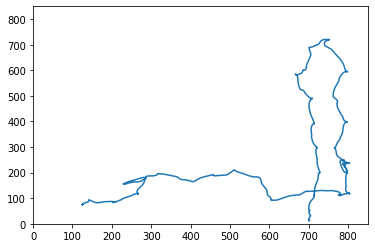

9.4S2C3M1


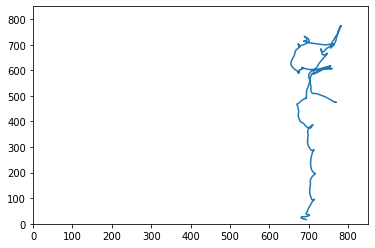

9.5S1C2M2


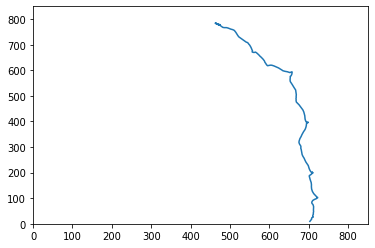

9.4S3C1M1


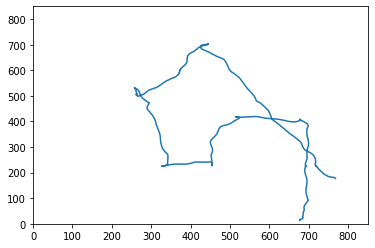

9.2S1C3M1


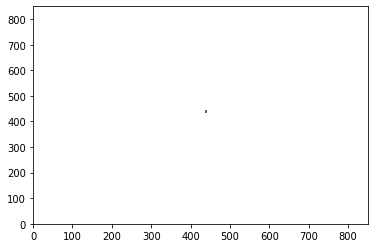

9.5S1C1M0


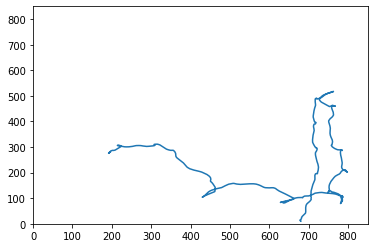

9.5S1C3M1


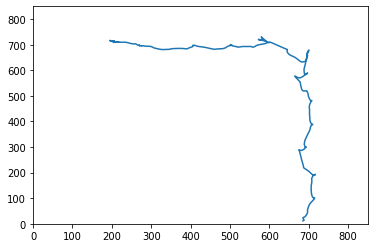

9.3S1C2M2


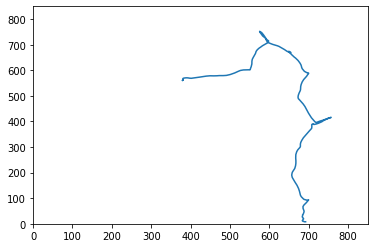

9.3S2C3M2


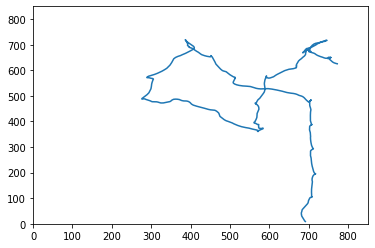

9.4S1C1M2


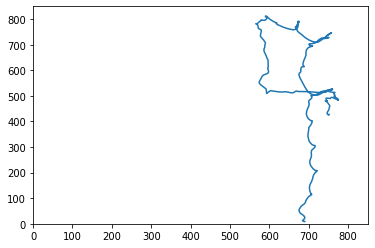

9.4S2C2M0


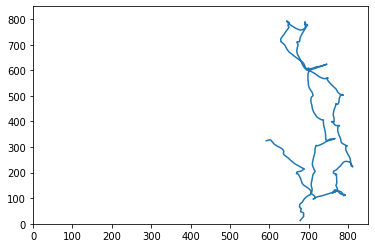

9.5S1C3M2


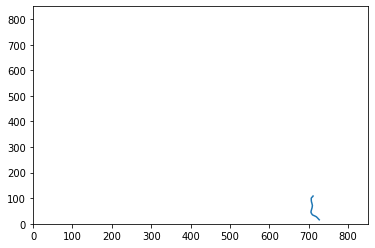

9.5S1C3M0


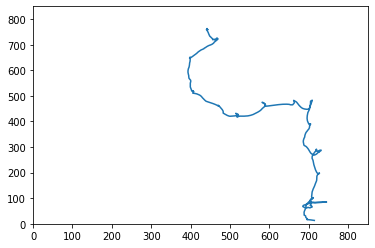

9.4S3C2M2


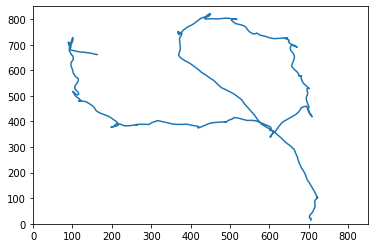

9.3S2C1M1


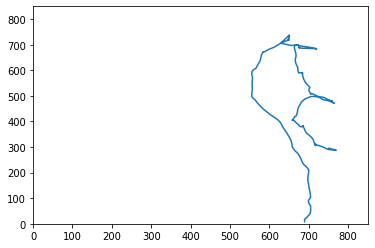

9.3S3C1M1


In [6]:
result_lesion, err = get_file_names("/home/david/Desktop/Ania/New_setup/Experiment_lesion", notes_table_lesion)
result_lesion2 = result_lesion.fillna(0)
result_lesion = result_lesion2.loc[(result_lesion2['exploitation_time'] > 0)]

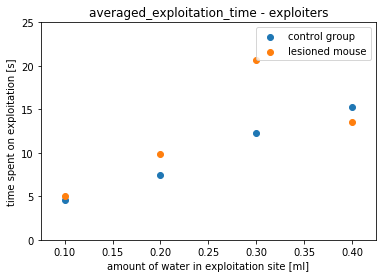

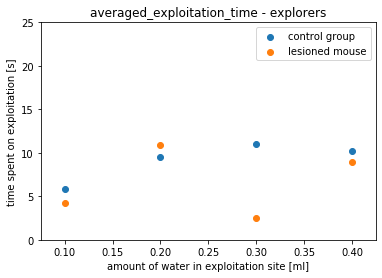

In [77]:
def plot_mean_water_lesion(result_lesion, mice_type): 
    if mice_type == "exploiters":
        mice_numb = [(2,2), (3,0), (3,2)]
        mice_numb_les = (3,1)
    elif mice_type == "explorers":
        mice_numb= [(1,0), (1,2), (2,0), (2,1)]
        mice_numb_les = (1,1)
    water_amount = [0.1, 0.2, 0.3, 0.4]
    lists = []
    lists_les = []
    for k in water_amount:
        time_exploit = 0
        num = 0
        for j, i in mice_numb:
            cage_number = j
            mice_number = i
            data = result_lesion.loc[(result_lesion['cage'] == cage_number)&(result_lesion['mice'] == mice_number)&(result_lesion['water_exploitation'] == k)]
            time_exploit = time_exploit + data['exploitation_time'].sum()
            num = num + len(data['exploitation_time'])
        aver = time_exploit/num
        
        cage_number = mice_numb_les[0]
        mice_number = mice_numb_les[1]
        data = result_lesion.loc[(result_lesion['cage'] == cage_number)&(result_lesion['mice'] == mice_number)&(result_lesion['water_exploitation'] == k)]
        time_exploit_les =  data['exploitation_time'].sum()
        num_les = len(data['exploitation_time'])
        aver_les = time_exploit_les/num_les
        
        
        lists.append(aver)
        lists_les.append(aver_les)
    plt.title("averaged_exploitation_time -" + " " + mice_type )
    plt.xlabel("amount of water in exploitation site [ml]")
    plt.ylabel("time spent on exploitation [s]")
    plt.scatter(water_amount, lists, label='control group')
    plt.scatter(water_amount, lists_les, label='lesioned mouse' )
    plt.ylim(0, 25)
    plt.legend()
    plt.show()
    
def plot_mice_separately_lesion(result_lesion, mice_type):
    if mice_type == "exploiters":
        mice_numb = [(2,2), (3,0), (3,2)]
        mice_numb_les = (3,1)
    elif mice_type == "explorers":
        mice_numb= [(1,0), (1,2), (2,0), (2,1)]
        mice_numb_les = (1,1)
    water_amount = [0.1, 0.2, 0.3, 0.4]
    lists = []
    lists_les = []
    for k in water_amount:
        time_exploit = 0
        num = 0
        for j, i in mice_numb:
            cage_number = j
            mice_number = i
            data = result_lesion.loc[(result_lesion['cage'] == cage_number)&(result_lesion['mice'] == mice_number)&(result_lesion['water_exploitation'] == k)]
            time_exploit = time_exploit + data['exploitation_time'].sum()
            num = num + len(data['exploitation_time'])

    
plot_mean_water_lesion(result_lesion, "exploiters")
plot_mean_water_lesion(result_lesion, "explorers")
# plot_mice separately_lesion(result_lesion, "exploiters")
